# BitPredict

Time series problems deal with data over time.

Ex: No of staff over 10-years, sales of computers for the past 5-years

The timeline can be short (s/min) or long (years/decades)

<img src='https://camo.githubusercontent.com/cf5d133477c6ac29e568767d497f5d691cec66673e4c4f9aad013e50eb8e4080/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d6578616d706c652d74696d652d7365726965732d70726f626c656d732e706e67' />

For the forecasting of Bitcoin, the historical data for the past month can be the data and the label could be today's price (cannot be tomorrow's price since that was we'd want to predict).

### import data

In [2]:
import requests
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
url = 'http://api.scraperlink.com/investpy/?email=your@email.com&type=historical_data&product=cryptos&symbol=BTC&from_date=10/01/2013&to_date=10/04/2022'

response = requests.request('GET', url)

prices = response.json()['data']
prices

[{'direction_color': 'greenFont',
  'rowDate': 'Oct 04, 2022',
  'rowDateRaw': 1664841600,
  'rowDateTimestamp': '2022-10-04T00:00:00Z',
  'last_close': '20,340.2',
  'last_open': '19,629.7',
  'last_max': '20,436.1',
  'last_min': '19,506.4',
  'volume': '368.17K',
  'volumeRaw': 368172,
  'change_precent': '3.63',
  'last_closeRaw': '20340.17773437500000',
  'last_openRaw': '19629.71875000000000',
  'last_maxRaw': '20436.06250000000000',
  'last_minRaw': '19506.42578125000000',
  'change_precentRaw': 3.626891602518687},
 {'direction_color': 'greenFont',
  'rowDate': 'Oct 03, 2022',
  'rowDateRaw': 1664755200,
  'rowDateTimestamp': '2022-10-03T00:00:00Z',
  'last_close': '19,628.3',
  'last_open': '19,057.6',
  'last_max': '19,676.0',
  'last_min': '19,001.3',
  'volume': '333.03K',
  'volumeRaw': 333028,
  'change_precent': '3.02',
  'last_closeRaw': '19628.28125000000000',
  'last_openRaw': '19057.63476562500000',
  'last_maxRaw': '19676.03515625000000',
  'last_minRaw': '19001.2734

In [4]:
data = pd.DataFrame(prices)
data.head()

,direction_color,rowDate,rowDateRaw,rowDateTimestamp,last_close,last_open,last_max,last_min,volume,volumeRaw,change_precent,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw,change_precentRaw
0,greenFont,"Oct 04, 2022",1664841600,2022-10-04T00:00:00Z,"20,340.2","19,629.7","20,436.1","19,506.4",368.17K,368172,3.63,20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000,3.626892
1,greenFont,"Oct 03, 2022",1664755200,2022-10-03T00:00:00Z,"19,628.3","19,057.6","19,676.0","19,001.3",333.03K,333028,3.02,19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000,3.023788
2,redFont,"Oct 02, 2022",1664668800,2022-10-02T00:00:00Z,"19,052.2","19,311.9","19,389.9","18,937.3",222.82K,222824,-1.34,19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000,-1.344844
3,redFont,"Oct 01, 2022",1664582400,2022-10-01T00:00:00Z,"19,311.9","19,422.9","19,480.3","19,172.6",173.91K,173906,-0.57,19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000,-0.572030
4,redFont,"Sep 30, 2022",1664496000,2022-09-30T00:00:00Z,"19,423.0","19,593.4","20,174.9","19,208.9",490.29K,490290,-0.87,19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000,-0.867390


Column definitions:
* `last_close`: closing price of the time interval (last price btc trades at before market closes)
* `last_open`: Opening price of the time interval (first price btc trades at when market opens)
* `last_max`: Highest price btc was traded for during time interval
* `last_min`: Lowest price btc was traded for during time interval

In [5]:
# Remove unnecessary columns
data.drop(columns=[
  'direction_color',
  'rowDateRaw',
  'rowDateTimestamp',

  # Quantity of btc bought or sold
  'volume',
  'volumeRaw',
  'change_precent',
  'change_precentRaw',
  'last_close',
  'last_open',
  'last_max',
  'last_min'
  ],
  inplace=True
)

data.head()

,rowDate,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
0,"Oct 04, 2022",20340.17773437500000,19629.71875000000000,20436.06250000000000,19506.42578125000000
1,"Oct 03, 2022",19628.28125000000000,19057.63476562500000,19676.03515625000000,19001.27343750000000
2,"Oct 02, 2022",19052.18359375000000,19311.94921875000000,19389.89062500000000,18937.32617187500000
3,"Oct 01, 2022",19311.89843750000000,19422.89843750000000,19480.29882812500000,19172.61523437500000
4,"Sep 30, 2022",19423.00390625000000,19593.38476562500000,20174.87890625000000,19208.85351562500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3291 entries, 0 to 3290
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rowDate        3291 non-null   object
 1   last_closeRaw  3291 non-null   object
 2   last_openRaw   3291 non-null   object
 3   last_maxRaw    3291 non-null   object
 4   last_minRaw    3291 non-null   object
dtypes: object(5)
memory usage: 128.7+ KB


In [7]:
# Convert date object to datetime
data['rowDate'] = pd.to_datetime(data['rowDate'])

# Convert values to floats
data = data.astype({ 'last_closeRaw': 'float', 'last_openRaw': 'float', 'last_maxRaw': 'float', 'last_minRaw': 'float' })

In [8]:
data.set_index('rowDate', inplace=True)

In [9]:
data.head()

,last_closeRaw,last_openRaw,last_maxRaw,last_minRaw
rowDate,,,,
2022-10-04,20340.177734,19629.718750,20436.062500,19506.425781
2022-10-03,19628.281250,19057.634766,19676.035156,19001.273438
2022-10-02,19052.183594,19311.949219,19389.890625,18937.326172
2022-10-01,19311.898438,19422.898438,19480.298828,19172.615234
2022-09-30,19423.003906,19593.384766,20174.878906,19208.853516


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2022-10-04 to 2013-10-01
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   last_closeRaw  3291 non-null   float64
 1   last_openRaw   3291 non-null   float64
 2   last_maxRaw    3291 non-null   float64
 3   last_minRaw    3291 non-null   float64
dtypes: float64(4)
memory usage: 128.6 KB


In [11]:
len(data)

3291

In time series problems, usually the no. of samples is much less (eventhough the data for 9 years is present its only 3291 rows), which can be an issue since DL algorithms fluorish with lots of data (1000s or even millions)

**Note**: The frequency at which a time series value is collected is often referred to as **seasonality** (no. of samples per year), which is usually measured in no. of samples per year.
* Collecting data once per year would result in a time series with a seasonality of 365.

**Side-note**: time series data collected with different seasonality values often exhibit seasonal patterns
* Ex: electricity demand is higher in summer than winter (AC)

<img src='https://camo.githubusercontent.com/0e163454f6671cdbcd43dd1dabbd191c9e7256e8bbf82ef3076c2169d91eecec/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74797065732d6f662d74696d652d7365726965732d7061747465726e732e706e67' />

In time series problems there're two types of data:
* Univariate - data deals with one variable (Ex: using price of bitcoin to predict price of bitcoin). Using the target to predict the target.
* Multivariate - data deals with more than one variable (Ex: using price of bitcoin & block rewards size to predict price of bitcoin). Using the target and another time series to predict the target

<img src='https://camo.githubusercontent.com/aa05b7ec4479d147154185a9208da36c24d7379f412f27307af64338a1ffda50/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d756e69766172696174652d616e642d6d756c7469766172696174652d74696d652d7365726965732d646174612e706e67' />

## Phase 01 - Univariate

### Data Exploration

In [12]:
bitcoin_prices = pd.DataFrame(data['last_closeRaw']).rename(columns={ 'last_closeRaw': 'Price' })
bitcoin_prices.head()

,Price
rowDate,
2022-10-04,20340.177734
2022-10-03,19628.281250
2022-10-02,19052.183594
2022-10-01,19311.898438
2022-09-30,19423.003906


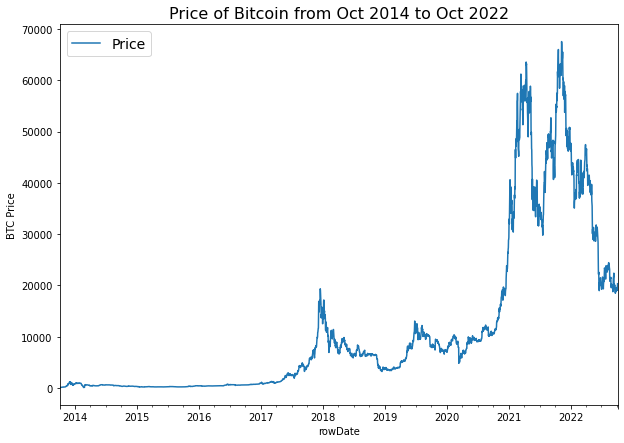

In [13]:
# Visualize closing prices
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel('BTC Price')
plt.title('Price of Bitcoin from Oct 2014 to Oct 2022', fontsize=16)
plt.legend(fontsize=14);

### Create train & test sets

*The wrong way*

In [14]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2022-10-04T00:00:00.000000000', '2022-10-03T00:00:00.000000000',
        '2022-10-02T00:00:00.000000000', '2022-10-01T00:00:00.000000000',
        '2022-09-30T00:00:00.000000000', '2022-09-29T00:00:00.000000000',
        '2022-09-28T00:00:00.000000000', '2022-09-27T00:00:00.000000000',
        '2022-09-26T00:00:00.000000000', '2022-09-25T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([20340.17773438, 19628.28125   , 19052.18359375, 19311.8984375 ,
        19423.00390625, 19592.95117188, 19410.95507812, 19080.99609375,
        19225.6796875 , 18803.17382812]))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    timesteps,
    prices,
    test_size=.2,
    random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

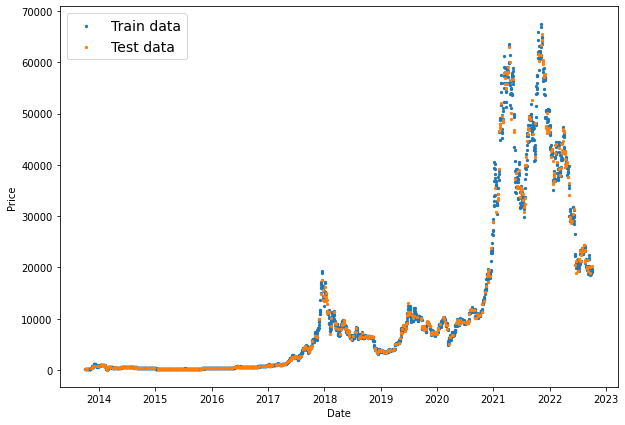

In [16]:
# Plot incorrect data splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend(fontsize=14)
plt.show();

This will not work out, since the test and training data are mixed up (data leakage)

The `train_test_split` randomly splits the data, which is fine for a NLP/classification or other regression problems, however things change when a time component is involved

Since forecasting has a time component that must be given most priority. In this case we want to predict the future values of btc prices using the past prices

IOW, for training data the prices up to a specific point must be used and for the test data the prices ahead of the specified point must be used.
* Ex: for training prices from 2013-2020 can be used, for test the prices from 2020-2022 must be used

*The right way*

<img src='https://camo.githubusercontent.com/4905dce383c2fabee4fb25f6308f93b208c3b2f97011391768e16cabbd9e419b/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74696d652d7365726965732d747261696e2d746573742d73706c69742e706e67' />

A specific point in time can be used as the split point (aka a pseudofuture), everything before that can be taken for training and everything after that for testing

In [17]:
# Create sequential splits at a specified point (80% train, 20% test)
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

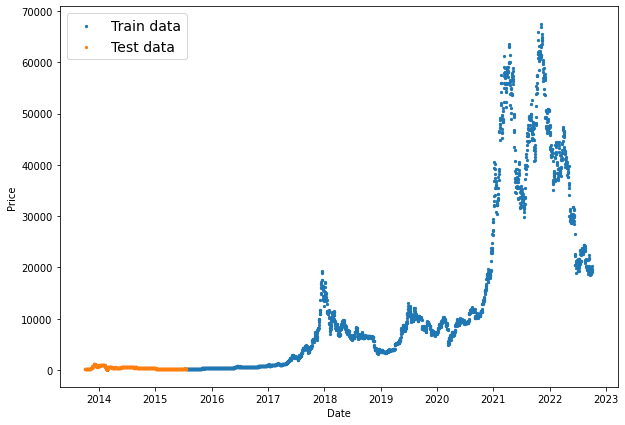

In [18]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show();

This is happening since the data is ordered in descending order - try again after ordering it ascendingly

In [19]:
bitcoin_prices.sort_values('rowDate', inplace=True)
bitcoin_prices.head()

,Price
rowDate,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [20]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices['Price'].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([140.30000305, 123.        , 130.99000549, 136.82000732,
        136.69999695, 137.80000305, 135.80000305, 136.49000549,
        139.5       , 140.41000366]))

In [21]:
split_size = int(.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2632,), (659,), (2632,), (659,))

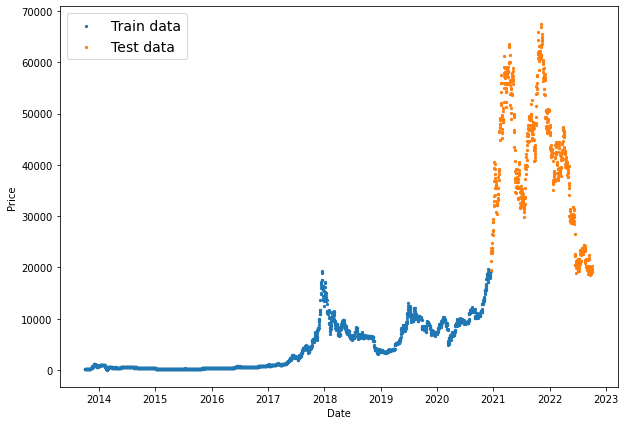

In [22]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label='Train data')
plt.scatter(X_test, y_test, s=5, label='Test data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(fontsize=14)
plt.show();

Since the test data is a pseudofuture, and the actual data is available, this can be used as a guide to check if the predictions are accurate or not

In [23]:
# Create a helper plotting function
def plot_time_series(timesteps, prices, format='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], prices[start:end], format, label=label)
    plt.xlabel('Time')
    plt.ylabel('Price')
    if label:
        plt.legend(fontsize=14)
    # Display a grid for easier measurement readings
    plt.grid(True)

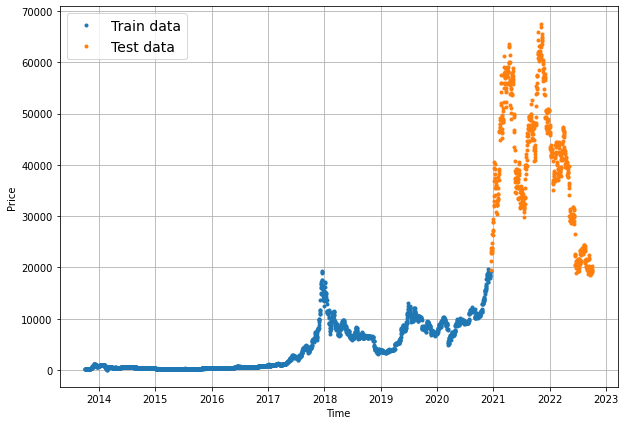

In [24]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')

### Modelling experiments

Almost any kind of model can be built as long as the inputs & outputs are formatted correctly. However, this does not mean that they will perform well

Two key terms to remember about forecasting:
* **Horizon** - the number of timesteps to be predicted
* **Window** - the number of timesteps used to predict the horizon

Ex: For predicting the price of btc tomorrow using last weeks data - horizon of 1 and window of 7

### Model 0 - Naive forecast

One of the most common baseline models. All this does is use the previous timesteps value to predict the next timesteps value.

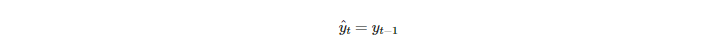

> The prediction at timestep `t` is equal to the value at timestep `t-1`

**Side-note**: In an open system (stock/crypto market - where inputs & outputs freely flow) it usually is hard to perform better than the naive forecast than in a closed system (pocker game winner prizes - where the inputs & outputs are contained within the system)

*Forecasting in an open system is usually poor*

In [25]:
# Naive forecast - every value except the last value (will be predicting this)
naive_forecast = y_test[:-1]

naive_forecast[:10], naive_forecast[-10:]

(array([19434.85546875, 21352.16210938, 22825.375     , 23127.92382812,
        23843.95507812, 23474.87890625, 22728.51757812, 23823.15039062,
        23257.91210938, 23736.48242188]),
 array([18925.19921875, 18803.17382812, 19225.6796875 , 19080.99609375,
        19410.95507812, 19592.95117188, 19423.00390625, 19311.8984375 ,
        19052.18359375, 19628.28125   ]))

ValueError: x and y must have same first dimension, but have shapes (659,) and (658,)

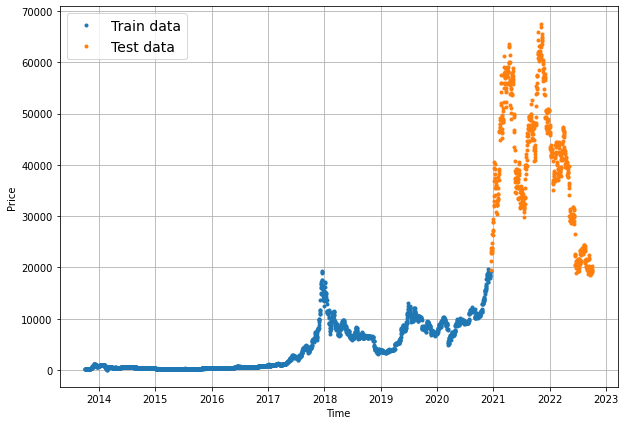

In [26]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')
plot_time_series(timesteps=X_test, prices=naive_forecast, label='Naive forecast')

In [29]:
X_test.shape, naive_forecast.shape

((659,), (658,))

In [30]:
naive_forecast[-10:], y_test[-10:]

(array([18925.19921875, 18803.17382812, 19225.6796875 , 19080.99609375,
        19410.95507812, 19592.95117188, 19423.00390625, 19311.8984375 ,
        19052.18359375, 19628.28125   ]),
 array([18803.17382812, 19225.6796875 , 19080.99609375, 19410.95507812,
        19592.95117188, 19423.00390625, 19311.8984375 , 19052.18359375,
        19628.28125   , 20340.17773438]))

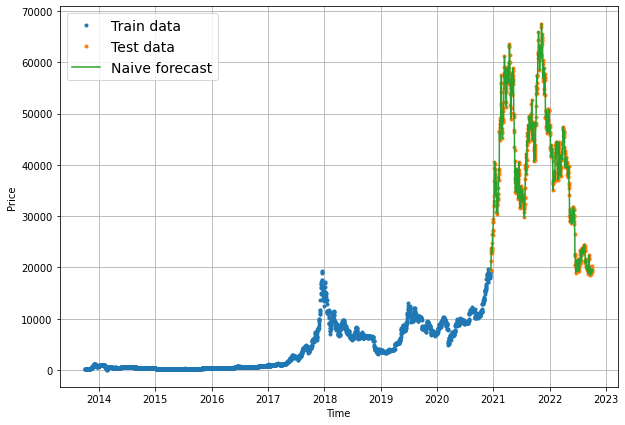

In [31]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, prices=y_train, label='Train data')
plot_time_series(timesteps=X_test, prices=y_test, label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, format='-', label='Naive forecast')

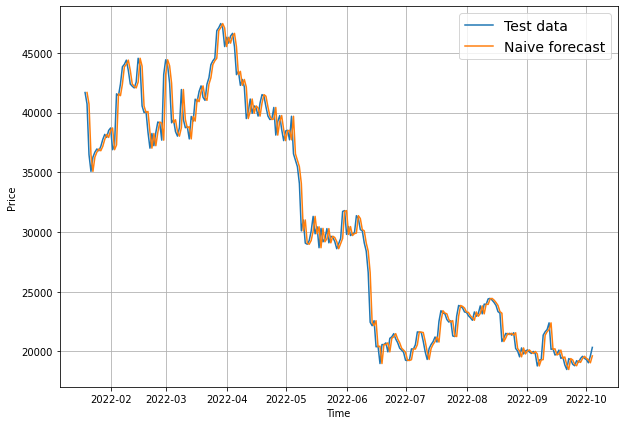

In [32]:
plt.figure(figsize=(10, 7))
offset=400
plot_time_series(timesteps=X_test, prices=y_test, start=offset,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, start=offset, format='-', label='Naive forecast')

The naive forecast lags ahead of the ground truths the same throughout, since it uses the previous timestep value to predict the next

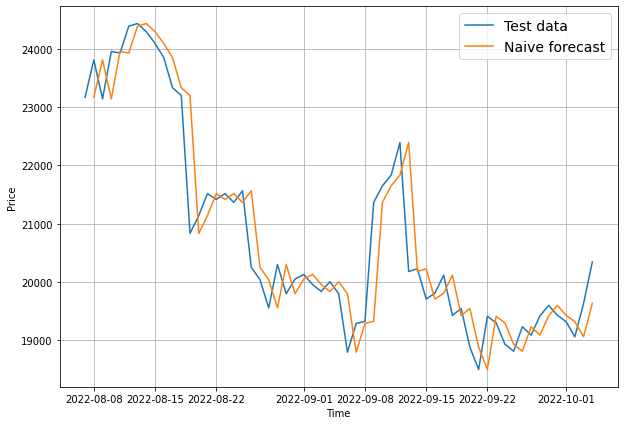

In [33]:
plt.figure(figsize=(10, 7))
offset=600
plot_time_series(timesteps=X_test, prices=y_test, start=offset,format='-', label='Test data')
plot_time_series(timesteps=X_test[1:], prices=naive_forecast, start=offset, format='-', label='Naive forecast')

### Evaluating a model

Since this forecast depends on predicting a number, its a regression kinda problem. Therefore, the metrics used for regression can be used for evaluation

> How does the predictions compare against the ground truths

**Scale-dependent errors**
* Used to compare time series values and forecasts that are on the same scale (Ex: btc historical prices vs btc forecast prices)
  * MAE - easy to interpret, simply is just the difference in values.
  * MSE - squared differences, used when the larger errors are more significant that smaller errors
  * RMSE - also easy to interpret and is the square root of MSE.
  
**Percentage errors**
* Do not have units, therefore is used as to compare forecasts across other other datasets
  * MAPE - most common percentage error. Might explode (not work) if `y=0`
  * sMAPE - is not recommended, although used in many competitions

**Scaled errors**
* An alternative to percentage errors when comparing forecast performance across other datasets
  * MASE - equals to one for naive forecast. Therefore, a better forecast would be a model that gets an MASE < 1
  
*Good to start with MAE, since its the most simplest*

In [34]:
# Create MASE function (Not in tf API)
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    
    # btc price forecasting in non-seasonal - shift by 1 cuz seasonality is 1 day
    # (collect data each day)
    mae_naive_no_reason = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae / mae_naive_no_reason

In [35]:
# MASE for naive forecast is almost 1
mean_absolute_scaled_error(y_test[1:], naive_forecast).numpy()

1.0010289163281425

In [36]:
# Create a helper function with all eval metrics
def evaluate_preds(y_true, y_pred):
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy(),
    }

In [37]:
naive_forecast_results = evaluate_preds(y_test[1:], naive_forecast)
naive_forecast_results

{'mae': 1144.453519780585,
 'mse': 2611117.2588876244,
 'rmse': 1615.8951880885172,
 'mape': '2.8748727508170346%',
 'mase': 1.0010289163281425}

Seems like on average each forecast differs by about $1144 from the actual price

In [38]:
tf.reduce_mean(y_test).numpy(), tf.reduce_min(y_test).numpy(), tf.reduce_max(y_test).numpy()

(40100.593901152315, 18488.98828125, 67527.8515625)

On average the price is 40,100, and each forecast is off by about 1144

### Other baseline models

Some of the below models might even perform much better...
* Moving Average
* ARIMA
* TensorFlow Decision Forests (RF, Gradient Boosting Trees)
* Facebook Kats
* LinkedIn Greykite

### Format data: Windowing dataset

Windowing is a method to turn a time series dataset into a supervised learning problem. IOW use the windows of the past to predict the future

It is important to carry out chronological testing since ordering matters. Therefore, random pieces of data cannot be used as test and train sets

Two methods of of testing forecasting models

<img src='http://eng.uber.com/wp-content/uploads/2018/09/image6-e1536165830511.png' />

In Sliding Window:
* fixed size window
Expanding Window:
 * Uses more and more training data while keeping test window fixed
 * More useful if there is less data
 
Its often also the best to combine both: start with expanding window, and switch to sliding window once the window gets too large

Ex: for univariate time series, windowing for one week (`window=7`) to predict the next value (`horizon=1`) will look like:

```javascript
Windowing for one week
[0, 1, 2, 3, 4, 5, 6] -> [7]
[1, 2, 3, 4, 5, 6, 7] -> [8]
[2, 3, 4, 5, 6, 7, 8] -> [9]
```

for the case of the price of bitcoin:
```javascript
[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]
```

<img src='https://camo.githubusercontent.com/c6c284ca3066e7f927f106143212ea5cd80184a7a7d1f4f21fcef482b761eb0d/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6d7264626f75726b652f74656e736f72666c6f772d646565702d6c6561726e696e672f6d61696e2f696d616765732f31302d74696d652d7365726965732d77696e646f77732d616e642d686f72697a6f6e732e706e67' />

Can we predict the price of bitcoin tomorrow given the past week of prices?

In [39]:
# predict 1 step at a time
HORIZON = 1

# use a week worth of timesteps to predict the horizon
WINDOW_SIZE = 7

In [40]:
print(f'Use {prices[:7]} to predict {prices[7]}')

Use [140.30000305 123.         130.99000549 136.82000732 136.69999695
 137.80000305 135.80000305] to predict 136.49000549316406


In [41]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
    return x[:, :-horizon], x[:, -horizon:]

In [42]:
tf.expand_dims(tf.range(8), axis=0)

<tf.Tensor: shape=(1, 8), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6, 7]])>

In [43]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0), horizon=HORIZON)
test_window, test_label

(<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]])>,
 <tf.Tensor: shape=(1, 1), dtype=int32, numpy=array([[7]])>)

In [44]:
len(prices)

3291

In [45]:
# Create a function to make windows across entire time series
def make_windows(x, window_size=7, horizon=1):
    # Create a window of specific window_size
    window_step = np.expand_dims(np.arange(window_size + horizon), axis=0)
    print(f'Window step: {window_step}')
    
    # Create a 2D array of multiple window steps
    window_indexes = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T
    print(f'Window indexes: {window_indexes}')
    
    windowed_array = x[window_indexes]
    print(f'Window array: {windowed_array}')
    
    windows, labels = get_labelled_windows(windowed_array, horizon)
    return windows, labels

In [46]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: [[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [3281 3282 3283 ... 3286 3287 3288]
 [3282 3283 3284 ... 3287 3288 3289]
 [3283 3284 3285 ... 3288 3289 3290]]
Window array: [[  140.30000305   123.           130.99000549 ...   137.80000305
    135.80000305   136.49000549]
 [  123.           130.99000549   136.82000732 ...   135.80000305
    136.49000549   139.5       ]
 [  130.99000549   136.82000732   136.69999695 ...   136.49000549
    139.5          140.41000366]
 ...
 [18803.17382812 19225.6796875  19080.99609375 ... 19423.00390625
  19311.8984375  19052.18359375]
 [19225.6796875  19080.99609375 19410.95507812 ... 19311.8984375
  19052.18359375 19628.28125   ]
 [19080.99609375 19410.95507812 19592.95117188 ... 19052.18359375
  19628.28125    20340.17773438]]


In [47]:
full_windows.shape, full_labels.shape

((3284, 7), (3284, 1))

In [48]:
for i in range(5):
    print(f'Window: {full_windows[i]} -> Label: {full_labels[i]}')

Window: [140.30000305 123.         130.99000549 136.82000732 136.69999695
 137.80000305 135.80000305] -> Label: [136.49000549]
Window: [123.         130.99000549 136.82000732 136.69999695 137.80000305
 135.80000305 136.49000549] -> Label: [139.5]
Window: [130.99000549 136.82000732 136.69999695 137.80000305 135.80000305
 136.49000549 139.5       ] -> Label: [140.41000366]
Window: [136.82000732 136.69999695 137.80000305 135.80000305 136.49000549
 139.5        140.41000366] -> Label: [140.1000061]
Window: [136.69999695 137.80000305 135.80000305 136.49000549 139.5
 140.41000366 140.1000061 ] -> Label: [142.88999939]


### Turn windows into train & test sets

It was possible to window the existing training & test splits, however, with the nature of windowing (often requires an offset at some point in the data), it usually works better to window the data first before splitting

In [49]:
def make_train_test_splits(windows, labels, test_split=.2):
    split_size = int(len(windows) * (1 - test_split)) # 80%
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows, test_windows, train_labels, test_labels

In [50]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2627, 657, 2627, 657)

In [51]:
# Check to see if original y_train and new labels are same
y_train[WINDOW_SIZE:]

array([  136.49000549,   139.5       ,   140.41000366, ...,
       18808.91992188, 19176.78710938, 19273.83789062])

In [52]:
np.squeeze(train_labels[:-HORIZON - 1])

array([  136.49000549,   139.5       ,   140.41000366, ...,
       18808.91992188, 19176.78710938, 19273.83789062])

In [53]:
np.array_equal(np.squeeze(train_labels[:-HORIZON - 1]), y_train[WINDOW_SIZE:])

True

### Make checkpoint callbacks

In order for a fair comparison between the implemented models, their best performance must be compared.

Since the model's performance will fluctuate from experiment to experiment, the performance in epoch 100 might be lower than its performance in epoch 50.

Therefore, to save the best performing point of each model a checkpoint can be added that would monitor a specified metric and do so.

**Side-note**: Since the dataset is quite small, the experiment results will fluctuate quite a bit while training - making the need for checkpointing more important

In [54]:
import os

# Create a function to implement a model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints'):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True
    )

In [55]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5)

# create reduce lr on plateau callback
reduce_lr_plateau = tf.keras.callbacks.ReduceLROnPlateau()

### Model 01 - Dense model (Window = 7, horizon = 1)

* Single dense layer with 128 hidden units
* Output layer
* Adam optimizer, MAE loss function
* Batch size 128, epochs 100

**Side-note**
* Hyperparameters - params that could be tuned (batch size, epochs, hidden units, horizon size, window size)
* Parameters - params that the model learns/patterns (weights, biases)

In [96]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Predicting a number - so there's no need of an activation
    # No need to create probabilities/0-1/only positives
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_1_dense')

model_1.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae', 'mse']
)

history_1 = model_1.fit(
    train_windows,
    train_labels,
    validation_data=(test_windows, test_labels),
    epochs=100,
    batch_size=128,
    callbacks=[
#         early_stopping,
#         reduce_lr_plateau,
        create_model_checkpoint(model_1.name)
    ]
)

Epoch 1/100
21/21 [==============================] - 3s 148ms/step - loss: 1237.5881 - mae: 1237.5881 - mse: 5281300.0000 - val_loss: 4422.0908 - val_mae: 4422.0908 - val_mse: 29088844.0000
Epoch 2/100
21/21 [==============================] - 1s 55ms/step - loss: 337.8427 - mae: 337.8427 - mse: 409800.5000 - val_loss: 2512.7258 - val_mae: 2512.7258 - val_mse: 10963448.0000
Epoch 3/100
21/21 [==============================] - 1s 51ms/step - loss: 245.9140 - mae: 245.9140 - mse: 253138.8750 - val_loss: 2124.5815 - val_mae: 2124.5815 - val_mse: 8125024.0000
Epoch 4/100
21/21 [==============================] - 1s 51ms/step - loss: 226.1949 - mae: 226.1949 - mse: 220328.7031 - val_loss: 2109.2427 - val_mae: 2109.2427 - val_mse: 8002888.0000
Epoch 5/100
21/21 [==============================] - 1s 53ms/step - loss: 209.0859 - mae: 209.0859 - mse: 192887.6094 - val_loss: 1845.4597 - val_mae: 1845.4597 - val_mse: 6108729.0000
Epoch 6/100
21/21 [==============================] - 1s 56ms/step - l

Epoch 68/100
21/21 [==============================] - 0s 3ms/step - loss: 128.8539 - mae: 128.8539 - mse: 78734.9609 - val_loss: 1276.7529 - val_mae: 1276.7529 - val_mse: 3060789.7500
Epoch 69/100
21/21 [==============================] - 0s 3ms/step - loss: 124.2611 - mae: 124.2611 - mse: 76288.3281 - val_loss: 1171.1995 - val_mae: 1171.1995 - val_mse: 2713203.2500
Epoch 70/100
21/21 [==============================] - 1s 54ms/step - loss: 127.4245 - mae: 127.4245 - mse: 79041.7109 - val_loss: 1147.6472 - val_mae: 1147.6472 - val_mse: 2635306.0000
Epoch 71/100
21/21 [==============================] - 0s 3ms/step - loss: 129.5468 - mae: 129.5468 - mse: 79683.9453 - val_loss: 1532.1670 - val_mae: 1532.1670 - val_mse: 4053592.0000
Epoch 72/100
21/21 [==============================] - 0s 3ms/step - loss: 147.7409 - mae: 147.7409 - mse: 90099.7734 - val_loss: 1513.4128 - val_mae: 1513.4128 - val_mse: 3975560.5000
Epoch 73/100
21/21 [==============================] - 0s 3ms/step - loss: 147.0

In [97]:
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1199.2662 - mae: 1199.2662 - mse: 2795707.5000


[1199.2662353515625, 1199.2662353515625, 2795707.5]

Notice how the `val_loss` fluctuates a lot during each epoch since the dataset is quite small

In [98]:
model_1 = tf.keras.models.load_model('model_checkpoints/model_1_dense')
model_1.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1146.3971 - mae: 1146.3971 - mse: 2628007.2500


[1146.3970947265625, 1146.3970947265625, 2628007.25]

In [100]:
evaluate_preds(y_test[1:], naive_forecast)

{'mae': 1144.453519780585,
 'mse': 2611117.2588876244,
 'rmse': 1615.8951880885172,
 'mape': '2.8748727508170346%',
 'mase': 1.0010289163281425}

**Make forecasts**

Predictions on the test dataset aren't exactly forecasts - they're pseudo forecasts (since actual ones are into the real future)

In [57]:
# Create helper function to get predictions
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    
    # Make it 1D
    return tf.squeeze(forecast)

In [106]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

21/21 [==============================] - 0s 950us/step


(657,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([21177.285, 22675.703, 23183.127, 23784.818, 23600.785, 22906.5  ,
        23633.56 , 23275.537, 23721.67 , 24486.633], dtype=float32)>)

In [108]:
evaluate_preds(test_labels, model_1_preds)

TypeError: `x` and `y` must have the same dtype, got tf.float32 != tf.float64.

In [54]:
# Create updated helper function with all eval metrics
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy(),
    }

In [110]:
evaluate_preds(test_labels, model_1_preds)

{'mae': array([17947.29  , 17730.68  , 17246.945 , 17492.463 , 18017.572 ,
        17260.467 , 17639.654 , 17317.295 , 16710.328 , 15607.152 ,
        15727.084 , 15234.64  , 15039.735 , 14131.732 , 14083.667 ,
        13845.129 , 12400.469 , 12065.25  , 12478.63  , 11652.532 ,
        10778.423 , 10378.795 , 10367.439 , 10361.6045, 10503.503 ,
        11123.549 , 11621.053 , 10647.574 , 10396.273 , 10765.754 ,
        10985.005 , 11036.181 , 10824.771 , 10989.644 , 11144.355 ,
        13053.622 , 12047.557 , 12448.233 , 12378.779 , 12373.813 ,
        12263.179 , 13277.379 , 11892.767 , 11539.073 , 11545.773 ,
        12002.415 , 11835.54  , 11141.611 , 10596.923 , 10733.475 ,
        10488.318 , 10390.3125, 10423.953 , 11451.796 , 11489.946 ,
        11000.978 , 12080.067 , 11813.025 , 11731.161 , 12386.453 ,
        12055.32  , 12653.709 , 14353.265 , 14045.213 , 16864.123 ,
        16876.184 , 18000.32  , 15640.962 , 12519.554 , 12940.919 ,
        11639.599 , 11435.284 , 11367.309

In [111]:
test_labels.shape, model_1_preds.shape

((657, 1), TensorShape([657]))

In [210]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'mae': 1146.3967,
 'mse': 2628006.5,
 'rmse': 1621.1128,
 'mape': '2.881779670715332%',
 'mase': 1.00317}

In [157]:
naive_results = evaluate_preds(y_test[1:], naive_forecast)
naive_results

{'mae': 1144.4536,
 'mse': 2611117.2,
 'rmse': 1615.8951,
 'mape': '2.8748724460601807%',
 'mase': 1.001029}

Naive model slighly beats `model_1` in every metric

In [117]:
X_test

array(['2020-12-15T00:00:00.000000000', '2020-12-16T00:00:00.000000000',
       '2020-12-17T00:00:00.000000000', '2020-12-18T00:00:00.000000000',
       '2020-12-19T00:00:00.000000000', '2020-12-20T00:00:00.000000000',
       '2020-12-21T00:00:00.000000000', '2020-12-22T00:00:00.000000000',
       '2020-12-23T00:00:00.000000000', '2020-12-24T00:00:00.000000000',
       '2020-12-25T00:00:00.000000000', '2020-12-26T00:00:00.000000000',
       '2020-12-27T00:00:00.000000000', '2020-12-28T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2020-12-30T00:00:00.000000000',
       '2020-12-31T00:00:00.000000000', '2021-01-01T00:00:00.000000000',
       '2021-01-02T00:00:00.000000000', '2021-01-03T00:00:00.000000000',
       '2021-01-04T00:00:00.000000000', '2021-01-05T00:00:00.000000000',
       '2021-01-06T00:00:00.000000000', '2021-01-07T00:00:00.000000000',
       '2021-01-08T00:00:00.000000000', '2021-01-09T00:00:00.000000000',
       '2021-01-10T00:00:00.000000000', '2021-01-11

In [122]:
X_test.shape, test_windows.shape

((659,), (657, 7))

In [129]:
test_labels[:,0].shape

(657,)

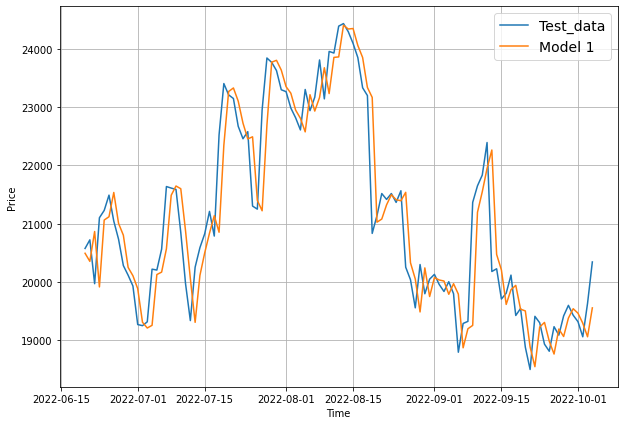

In [132]:
# Plot model_1 forecasts
offset = 550
plt.figure(figsize=(10, 7))

# Index into X_test (dates) to the point where test_windows begins 
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=test_labels[:, 0],
    start=offset,
    format='-',
    label='Test_data'
)
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=model_1_preds,
    start=offset,
    format='-',
    label='Model 1'
)

### Model 02 - Dense (window = 30, horizon = 1)

Use the past 30 days of prices to predict the next day

In [145]:
HORIZON = 1
WINDOW_SIZE = 30

In [142]:
full_windows[:10]

array([[140.30000305, 123.        , 130.99000549, 136.82000732,
        136.69999695, 137.80000305, 135.80000305],
       [123.        , 130.99000549, 136.82000732, 136.69999695,
        137.80000305, 135.80000305, 136.49000549],
       [130.99000549, 136.82000732, 136.69999695, 137.80000305,
        135.80000305, 136.49000549, 139.5       ],
       [136.82000732, 136.69999695, 137.80000305, 135.80000305,
        136.49000549, 139.5       , 140.41000366],
       [136.69999695, 137.80000305, 135.80000305, 136.49000549,
        139.5       , 140.41000366, 140.1000061 ],
       [137.80000305, 135.80000305, 136.49000549, 139.5       ,
        140.41000366, 140.1000061 , 142.88999939],
       [135.80000305, 136.49000549, 139.5       , 140.41000366,
        140.1000061 , 142.88999939, 147.52999878],
       [136.49000549, 139.5       , 140.41000366, 140.1000061 ,
        142.88999939, 147.52999878, 151.36999512],
       [139.5       , 140.41000366, 140.1000061 , 142.88999939,
        147.5299

In [146]:
# Make windowed data with appropriate horizon & window sizes
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)
len(full_windows), len(full_labels)

Window step: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30]]
Window indexes: [[   0    1    2 ...   28   29   30]
 [   1    2    3 ...   29   30   31]
 [   2    3    4 ...   30   31   32]
 ...
 [3258 3259 3260 ... 3286 3287 3288]
 [3259 3260 3261 ... 3287 3288 3289]
 [3260 3261 3262 ... 3288 3289 3290]]
Window array: [[  140.30000305   123.           130.99000549 ...   216.
    208.           211.16999817]
 [  123.           130.99000549   136.82000732 ...   208.
    211.16999817   213.42999268]
 [  130.99000549   136.82000732   136.69999695 ...   211.16999817
    213.42999268   211.69000244]
 ...
 [19952.69726562 19831.43164062 19999.94140625 ... 19423.00390625
  19311.8984375  19052.18359375]
 [19831.43164062 19999.94140625 19793.09179688 ... 19311.8984375
  19052.18359375 19628.28125   ]
 [19999.94140625 19793.09179688 18786.38085938 ... 19052.18359375
  19628.28125    20340.17773438]]


(3261, 3261)

In [147]:
# Has 30 now
full_windows[:10]

array([[140.30000305, 123.        , 130.99000549, 136.82000732,
        136.69999695, 137.80000305, 135.80000305, 136.49000549,
        139.5       , 140.41000366, 140.1000061 , 142.88999939,
        147.52999878, 151.36999512, 158.08999634, 152.82000732,
        157.58999634, 168.27999878, 183.1499939 , 186.1000061 ,
        192.77999878, 202.99000549, 227.97000122, 206.97999573,
        197.88000488, 188.55999756, 206.91000366, 206.8999939 ,
        216.        , 208.        ],
       [123.        , 130.99000549, 136.82000732, 136.69999695,
        137.80000305, 135.80000305, 136.49000549, 139.5       ,
        140.41000366, 140.1000061 , 142.88999939, 147.52999878,
        151.36999512, 158.08999634, 152.82000732, 157.58999634,
        168.27999878, 183.1499939 , 186.1000061 , 192.77999878,
        202.99000549, 227.97000122, 206.97999573, 197.88000488,
        188.55999756, 206.91000366, 206.8999939 , 216.        ,
        208.        , 211.16999817],
       [130.99000549, 136.8200

In [148]:
# Create train & test sets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows,
    full_labels,
    test_split=.2
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2608, 653, 2608, 653)

In [150]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON, activation='linear')
], name='model_2_dense')

model_2.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam()
)

model_2.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[
        create_model_checkpoint(model_2.name)
    ]
)

Epoch 1/100
21/21 [==============================] - 3s 144ms/step - loss: 2552.6611 - val_loss: 3571.9595
Epoch 2/100
21/21 [==============================] - 2s 98ms/step - loss: 507.8144 - val_loss: 3408.4675
Epoch 3/100
21/21 [==============================] - 1s 57ms/step - loss: 336.2404 - val_loss: 2685.2849
Epoch 4/100
21/21 [==============================] - 2s 81ms/step - loss: 301.4575 - val_loss: 2656.9932
Epoch 5/100
21/21 [==============================] - 1s 53ms/step - loss: 276.4595 - val_loss: 2301.9038
Epoch 6/100
21/21 [==============================] - 1s 67ms/step - loss: 237.5178 - val_loss: 2054.7703
Epoch 7/100
21/21 [==============================] - 1s 54ms/step - loss: 221.5212 - val_loss: 2033.2833
Epoch 8/100
21/21 [==============================] - 1s 50ms/step - loss: 211.8124 - val_loss: 1865.9736
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 201.2015 - val_loss: 2010.4958
Epoch 10/100
21/21 [==============================] - 

In [151]:
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1227.8386


1227.838623046875

In [152]:
model_2 = tf.keras.models.load_model('model_checkpoints/model_2_dense')
model_2.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 1227.8386


1227.838623046875

In [153]:
model_2_preds = make_preds(model_2, test_windows)

21/21 [==============================] - 0s 1ms/step


In [156]:
modeL_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
modeL_2_results

{'mae': 1227.8385,
 'mse': 2882849.5,
 'rmse': 1697.8956,
 'mape': '3.0637643337249756%',
 'mase': 1.0709338}

In [158]:
naive_results

{'mae': 1144.4536,
 'mse': 2611117.2,
 'rmse': 1615.8951,
 'mape': '2.8748724460601807%',
 'mase': 1.001029}

Still haven't beat the naive forecast

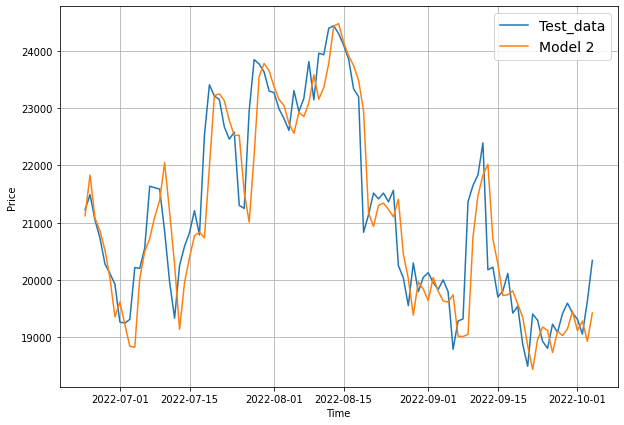

In [160]:
# Plot model_2 forecasts
offset = 550
plt.figure(figsize=(10, 7))

# Index into X_test (dates) to the point where test_windows begins 
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=test_labels[:, 0],
    start=offset,
    format='-',
    label='Test_data'
)
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=model_2_preds,
    start=offset,
    format='-',
    label='Model 2'
)

### Model 03 - Dense (window = 30, horizon = 7)

Predict 7 days ahead with the previous 30 days

In [166]:
HORIZON = 7
WINDOW_SIZE = 30

In [168]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

Window step: [[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
  24 25 26 27 28 29 30 31 32 33 34 35 36]]
Window indexes: [[   0    1    2 ...   34   35   36]
 [   1    2    3 ...   35   36   37]
 [   2    3    4 ...   36   37   38]
 ...
 [3252 3253 3254 ... 3286 3287 3288]
 [3253 3254 3255 ... 3287 3288 3289]
 [3254 3255 3256 ... 3288 3289 3290]]
Window array: [[  140.30000305   123.           130.99000549 ...   238.16000366
    251.30000305   264.1000061 ]
 [  123.           130.99000549   136.82000732 ...   251.30000305
    264.1000061    309.6499939 ]
 [  130.99000549   136.82000732   136.69999695 ...   264.1000061
    309.6499939    355.        ]
 ...
 [20033.93164062 19550.21875    20295.79882812 ... 19423.00390625
  19311.8984375  19052.18359375]
 [19550.21875    20295.79882812 19792.60351562 ... 19311.8984375
  19052.18359375 19628.28125   ]
 [20295.79882812 19792.60351562 20043.88085938 ... 19052.18359375
  19628.28125    20340.17773438]]


In [170]:
train_windows[0]

array([140.30000305, 123.        , 130.99000549, 136.82000732,
       136.69999695, 137.80000305, 135.80000305, 136.49000549,
       139.5       , 140.41000366, 140.1000061 , 142.88999939,
       147.52999878, 151.36999512, 158.08999634, 152.82000732,
       157.58999634, 168.27999878, 183.1499939 , 186.1000061 ,
       192.77999878, 202.99000549, 227.97000122, 206.97999573,
       197.88000488, 188.55999756, 206.91000366, 206.8999939 ,
       216.        , 208.        ])

In [171]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows,
    full_labels,
    .2
)

len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2604, 651, 2604, 651)

In [172]:
train_windows[0]

array([140.30000305, 123.        , 130.99000549, 136.82000732,
       136.69999695, 137.80000305, 135.80000305, 136.49000549,
       139.5       , 140.41000366, 140.1000061 , 142.88999939,
       147.52999878, 151.36999512, 158.08999634, 152.82000732,
       157.58999634, 168.27999878, 183.1499939 , 186.1000061 ,
       192.77999878, 202.99000549, 227.97000122, 206.97999573,
       197.88000488, 188.55999756, 206.91000366, 206.8999939 ,
       216.        , 208.        ])

In [173]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_3_Dense')

model_3.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam()
)

model_3.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[create_model_checkpoint(model_3.name)]
)

Epoch 1/100
21/21 [==============================] - 3s 144ms/step - loss: 1363.8530 - val_loss: 6357.5464
Epoch 2/100
21/21 [==============================] - 1s 46ms/step - loss: 584.0214 - val_loss: 4464.8965
Epoch 3/100
21/21 [==============================] - 1s 49ms/step - loss: 475.9903 - val_loss: 3922.0471
Epoch 4/100
21/21 [==============================] - 1s 47ms/step - loss: 423.7448 - val_loss: 3539.9429
Epoch 5/100
21/21 [==============================] - 1s 51ms/step - loss: 395.3824 - val_loss: 3364.6179
Epoch 6/100
21/21 [==============================] - 1s 48ms/step - loss: 371.4969 - val_loss: 3191.6091
Epoch 7/100
21/21 [==============================] - 1s 46ms/step - loss: 358.0955 - val_loss: 3149.7673
Epoch 8/100
21/21 [==============================] - 1s 47ms/step - loss: 348.0523 - val_loss: 2988.1108
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 342.2270 - val_loss: 3042.5374
Epoch 10/100
21/21 [==============================] - 

21/21 [==============================] - 1s 45ms/step - loss: 274.4174 - val_loss: 2505.2568
Epoch 54/100
21/21 [==============================] - 0s 3ms/step - loss: 275.7833 - val_loss: 2612.3545
Epoch 55/100
21/21 [==============================] - 1s 45ms/step - loss: 277.0657 - val_loss: 2484.1721
Epoch 56/100
21/21 [==============================] - 0s 3ms/step - loss: 275.8722 - val_loss: 2523.7341
Epoch 57/100
21/21 [==============================] - 0s 3ms/step - loss: 275.5602 - val_loss: 2513.7229
Epoch 58/100
21/21 [==============================] - 1s 52ms/step - loss: 273.1892 - val_loss: 2474.8157
Epoch 59/100
21/21 [==============================] - 1s 47ms/step - loss: 274.4951 - val_loss: 2471.4900
Epoch 60/100
21/21 [==============================] - 0s 3ms/step - loss: 274.2243 - val_loss: 2484.1550
Epoch 61/100
21/21 [==============================] - 0s 3ms/step - loss: 277.3991 - val_loss: 2489.6841
Epoch 62/100
21/21 [==============================] - 0s 3ms/ste

In [174]:
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2526.0100


2526.010009765625

In [175]:
model_3 = tf.keras.models.load_model('model_checkpoints/model_3_Dense')
model_3.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 1ms/step - loss: 2407.2073


2407.207275390625

In [176]:
model_3_preds = make_preds(model_3, test_windows)

21/21 [==============================] - 0s 2ms/step


In [179]:
model_3_preds

<tf.Tensor: shape=(651, 7), dtype=float32, numpy=
array([[20870.748, 21208.125, 20995.127, ..., 20962.844, 20572.004,
        20928.422],
       [22704.574, 22364.602, 22689.088, ..., 22557.076, 21978.576,
        22419.342],
       [23175.236, 23433.879, 23164.28 , ..., 23259.744, 22923.424,
        22951.268],
       ...,
       [18624.59 , 19533.848, 19130.021, ..., 18785.053, 18530.191,
        18960.795],
       [19241.932, 19238.348, 19348.959, ..., 19205.686, 18716.57 ,
        18876.63 ],
       [19476.62 , 19592.717, 19191.557, ..., 19012.264, 18732.797,
        19087.508]], dtype=float32)>

In [180]:
# Model 3 predicts 7 days in future, instead of just 1
model_3_preds.shape, model_2_preds.shape

(TensorShape([651, 7]), TensorShape([653]))

In [182]:
model_3_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_3_preds
)

model_3_results

{'mae': array([2468.7495 , 1033.284  ,  618.3761 ,  838.37335, 1274.7305 ,
        1934.5634 , 1973.8839 , 2906.2688 , 3197.1794 , 2969.0938 ,
        2514.2524 , 2720.594  , 2856.793  , 3286.0579 , 3472.0723 ,
        4518.5083 , 5814.2104 , 4634.0933 , 4286.135  , 4865.706  ,
        4016.2952 , 2748.2026 , 2068.2166 , 3404.3403 , 4432.8555 ,
        3927.0017 , 1549.1445 , 1726.3119 , 1344.0217 , 3470.6853 ,
        3314.4905 , 2816.9749 , 3012.178  , 3697.659  , 3403.1423 ,
        3416.0046 , 1056.9023 , 1222.8066 , 1444.5371 , 1821.8435 ,
        1828.505  , 2281.8474 , 4531.4185 , 3879.8005 , 2664.4392 ,
        2625.063  , 3411.5898 , 5794.934  , 6157.1313 , 5719.309  ,
        6212.3047 , 6729.168  , 6511.773  , 8063.535  , 3365.4348 ,
        1356.4447 , 1905.3917 , 1266.6786 , 2397.7644 , 3496.111  ,
        4138.6167 , 4699.14   , 4154.426  , 2761.7864 , 4174.5923 ,
        5324.604  , 7362.07   , 9962.859  , 8304.782  , 3951.9666 ,
        3074.5173 , 1585.2405 , 1732.2439

In [185]:
tf.squeeze(test_labels).shape, model_3_preds.shape

(TensorShape([651, 7]), TensorShape([651, 7]))

In [186]:
model_2_preds.shape, model_3_preds.shape

(TensorShape([653]), TensorShape([651, 7]))

Evaluations are one for each example since the predictions are a matrix

In [189]:
# Update helper function to handle multi-dimensional predictions (more than 1 horizon)
def evaluate_preds(y_true, y_pred):
    # Make sure float32 (for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculate various metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)

    # if mae isn't already a scalar - horizon must be > 1
    if mae.ndim > 0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)

    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse': rmse.numpy(),
        'mape': f'{mape.numpy()}%',
        'mase': mase.numpy()
    }

In [190]:
model_3_results = evaluate_preds(
    tf.squeeze(test_labels),
    model_3_preds
)

model_3_results

{'mae': 2407.2075,
 'mse': 10989158.0,
 'rmse': 2758.072,
 'mape': '6.031222820281982%',
 'mase': 2.0955436}

Errors are much worse since predictions are for a horizon of 7 than 1

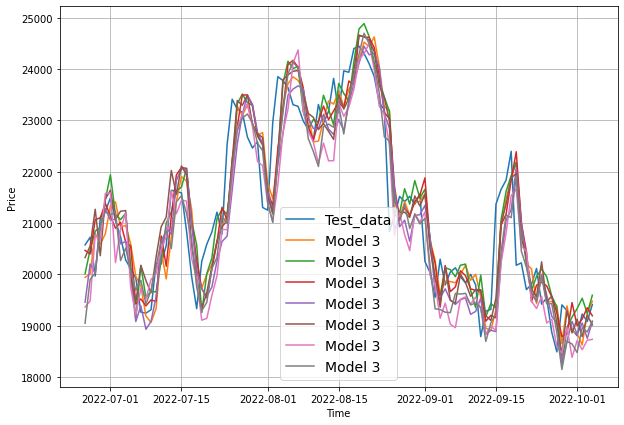

In [195]:
# Plot model_3 forecasts
offset = 550
plt.figure(figsize=(10, 7))

# Index into X_test (dates) to the point where test_windows begins 
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=test_labels[:, 0],
    start=offset,
    format='-',
    label='Test_data'
)
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=model_3_preds,
    start=offset,
    format='-',
    label='Model 3'
)

Issue here is the predictions are for each horizon

In [198]:
model_3_preds

<tf.Tensor: shape=(651, 7), dtype=float32, numpy=
array([[20870.748, 21208.125, 20995.127, ..., 20962.844, 20572.004,
        20928.422],
       [22704.574, 22364.602, 22689.088, ..., 22557.076, 21978.576,
        22419.342],
       [23175.236, 23433.879, 23164.28 , ..., 23259.744, 22923.424,
        22951.268],
       ...,
       [18624.59 , 19533.848, 19130.021, ..., 18785.053, 18530.191,
        18960.795],
       [19241.932, 19238.348, 19348.959, ..., 19205.686, 18716.57 ,
        18876.63 ],
       [19476.62 , 19592.717, 19191.557, ..., 19012.264, 18732.797,
        19087.508]], dtype=float32)>

In [193]:
model_2_preds

<tf.Tensor: shape=(653,), dtype=float32, numpy=
array([23461.068, 22838.002, 23536.475, 23308.02 , 23722.148, 24286.582,
       25795.879, 26293.523, 26901.043, 27301.258, 28339.893, 29114.71 ,
       29244.441, 31420.676, 32896.94 , 32366.355, 33365.727, 35982.176,
       38753.23 , 40178.32 , 40332.473, 39010.363, 36438.83 , 34116.99 ,
       35835.54 , 38277.555, 37481.473, 36006.88 , 35654.324, 36022.207,
       35762.652, 34809.793, 31541.416, 31936.8  , 32099.375, 31835.   ,
       31784.557, 31843.309, 30730.094, 31937.742, 33699.133, 34177.582,
       33481.31 , 33109.332, 34583.395, 36932.84 , 36822.703, 37196.5  ,
       39033.16 , 39608.074, 44248.44 , 46261.05 , 45362.285, 47406.324,
       47569.207, 47831.277, 47856.234, 48111.508, 48604.53 , 51674.332,
       51729.387, 54689.055, 55879.848, 56734.164, 54817.55 , 50787.34 ,
       48920.703, 46669.11 , 46003.26 , 45602.39 , 45070.156, 47525.484,
       48050.223, 49246.066, 48751.688, 48951.285, 48247.082, 49697.848,
   

In [200]:
tf.reduce_mean(model_3_preds, axis=1)

<tf.Tensor: shape=(651,), dtype=float32, numpy=
array([20828.639, 22394.264, 23157.287, 23642.928, 23564.447, 23105.531,
       23765.666, 23442.908, 23896.705, 24791.982, 26066.656, 26817.105,
       27390.162, 27905.979, 28852.041, 29307.143, 29617.066, 31934.129,
       33314.242, 32953.242, 33833.24 , 36303.383, 38779.594, 40688.977,
       41180.832, 40338.895, 37559.715, 35308.56 , 36755.96 , 38847.73 ,
       38142.207, 37083.18 , 36631.254, 36826.84 , 36032.223, 35320.465,
       32325.7  , 32432.084, 31940.416, 31646.771, 31904.652, 31803.809,
       29999.371, 31166.314, 33512.918, 34462.918, 33897.688, 33193.195,
       34405.758, 35870.62 , 36950.28 , 37729.715, 39256.395, 38924.293,
       43842.48 , 46541.965, 46809.402, 48393.23 , 48171.375, 48109.75 ,
       49017.707, 49044.707, 49970.605, 51840.777, 52240.793, 55711.06 ,
       56931.145, 58147.895, 55844.645, 51422.258, 50644.47 , 47934.945,
       46797.793, 46243.277, 44954.32 , 47803.098, 48246.004, 49079.18 ,
   

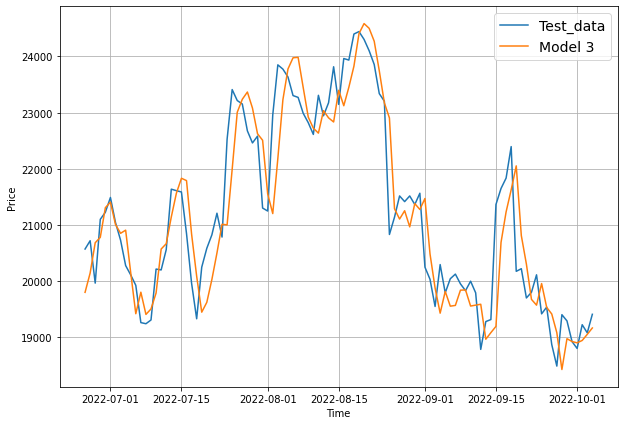

In [201]:
# Plot model_3 forecasts
offset = 550
plt.figure(figsize=(10, 7))

# Index into X_test (dates) to the point where test_windows begins 
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=test_labels[:, 0],
    start=offset,
    format='-',
    label='Test_data'
)
plot_time_series(
    timesteps=X_test[-len(test_windows):],
    prices=tf.reduce_mean(model_3_preds, axis=1),
    start=offset,
    format='-',
    label='Model 3'
)

This is basically the 7 horizon prediction condensed into a single value and displayed as a single horizon forecast

In [202]:
# Is the actual 7 day horizon prediction
model_3_preds[0]

<tf.Tensor: shape=(7,), dtype=float32, numpy=
array([20870.748, 21208.125, 20995.127, 20263.197, 20962.844, 20572.004,
       20928.422], dtype=float32)>

In [204]:
# Is an overall aggregation of all 7 values
tf.reduce_mean(model_3_preds[0])

<tf.Tensor: shape=(), dtype=float32, numpy=20828.639>

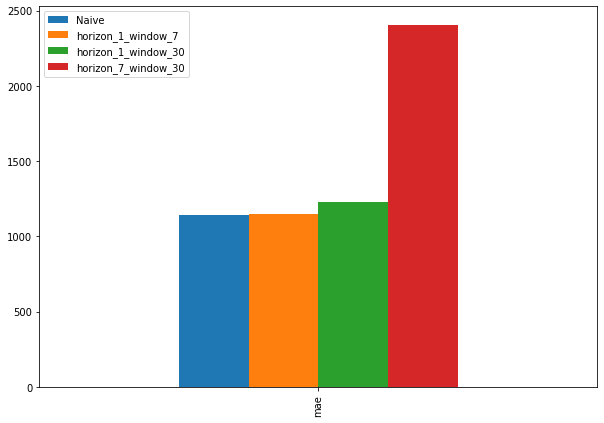

In [220]:
# What model is performing the best
pd.DataFrame({
    'Naive': naive_results['mae'],
    'horizon_1_window_7': model_1_results['mae'],
    'horizon_1_window_30': modeL_2_results['mae'],
    'horizon_7_window_30': model_3_results['mae'],
}, index=['mae']).plot(figsize=(10, 7), kind='bar');

Naive still appears to be performing the best - as it is very hard to beat in open systems

**Note**: This is possibly due to the presence of **autocorrelation**. This basically means that the value at `t+1` is typically close to the value at `t` (value today is very close to the value yesterday). Ofc this isn't always the case, but if it is, the naive model is quite accurate

### Model 04 - Conv1D (Window = 7, Horizon = 1)

Predict the next day's price using the past 7 days

[Conv1D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D) models can be used for seq2seq (sequence to sequence) problems.

Creates a 1D convolutional layer (Ex: temporal (involves a time component) convolution)

In this case, the input sequence is the previous 7 days of btc price data and the output is the next day

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-bitcoin-forecast-in-seq2seq-terms.png' />

in seq2seq terms this is a many-to-one problem (if the window size > 1 and horizon > 1, it'll be many-to-many)

In [42]:
HORIZON = 1
WINDOW_SIZE = 7

In [45]:
full_windows, full_labels = make_windows(prices, WINDOW_SIZE, HORIZON)

Window step: [[0 1 2 3 4 5 6 7]]
Window indexes: [[   0    1    2 ...    5    6    7]
 [   1    2    3 ...    6    7    8]
 [   2    3    4 ...    7    8    9]
 ...
 [3281 3282 3283 ... 3286 3287 3288]
 [3282 3283 3284 ... 3287 3288 3289]
 [3283 3284 3285 ... 3288 3289 3290]]
Window array: [[  140.30000305   123.           130.99000549 ...   137.80000305
    135.80000305   136.49000549]
 [  123.           130.99000549   136.82000732 ...   135.80000305
    136.49000549   139.5       ]
 [  130.99000549   136.82000732   136.69999695 ...   136.49000549
    139.5          140.41000366]
 ...
 [18803.17382812 19225.6796875  19080.99609375 ... 19423.00390625
  19311.8984375  19052.18359375]
 [19225.6796875  19080.99609375 19410.95507812 ... 19311.8984375
  19052.18359375 19628.28125   ]
 [19080.99609375 19410.95507812 19592.95117188 ... 19052.18359375
  19628.28125    20340.17773438]]


In [46]:
len(full_windows), len(full_labels)

(3284, 3284)

In [47]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(
    full_windows,
    full_labels
)

In [51]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=128, kernel_size=8, padding='causal', activation='relu'),
    tf.keras.layers.Dense(HORIZON)
])

model_4.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam()
)

model_4.fit(
    train_windows,
    train_labels,
    batch_size=128,
    epochs=100,
    validation_data=(test_windows, test_labels),
    callbacks=[
        create_model_checkpoint(model_4.name)
    ]
)

Epoch 1/100


ValueError: in user code:

    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\ACER\AppData\Roaming\Python\Python37\site-packages\keras\engine\input_spec.py", line 251, in assert_input_compatibility
        f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential" "                 f"(type Sequential).
    
    Input 0 of layer "conv1d" is incompatible with the layer: expected min_ndim=3, found ndim=2. Full shape received: (None, 7)
    
    Call arguments received by layer "sequential" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None, 7), dtype=float32)
      • training=True
      • mask=None


hmm... Conv1D needs an extra dimension?

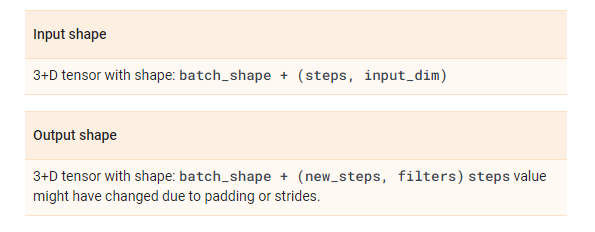

In [55]:
train_windows.ndim

2

In [56]:
train_windows[0].shape # -> (WINDOW_SIZE,)

(7,)

* `steps = WINDOW_SIZE`, aka as features. The features are the previous `WINDOW_SIZE` values of btc
* `input_dim = HORIZON`, in this case the model views one week of data to predict one day.

Therefore, as of now, the data has the `steps` dimension ready, but no the `input_dim` dimension (`batch_shape` is handled, by default being 32)

All of the data in `train_windows` could be adjusted to cater this new dimension, however a keras layer could also be used. The advatange of this is that it can be simply passed as an inital layer before the `Conv1D`

In [58]:
x = tf.constant(train_windows[0])

# add an extra dimension for timesteps
expand_dims_layer = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1))

# (WINDOW_SIZE)
print(f'Original shape: {x.shape}')

# (WINDOW_SIZE, input_dim)
print(f'Expanded shape: {expand_dims_layer(x).shape}')

print(f'Original values with expanded shape:\n {expand_dims_layer(x)}')

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[140.3 ]
 [123.  ]
 [130.99]
 [136.82]
 [136.7 ]
 [137.8 ]
 [135.8 ]]


In [61]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = 1)),
    tf.keras.layers.Conv1D(
        # Number of windows
        filters=128,
        
        # Size of the convolutional window
        kernel_size=5,
        
        # Used when modelling temporal data where the model should not violate
        # the temporal order
        padding='causal',
        activation='relu'
    ),
    tf.keras.layers.Dense(HORIZON)
], name = 'model_4_Conv1D')

model_4.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam()
)

model_4.fit(
    train_windows,
    train_labels,
    validation_data=(test_windows, test_labels),
    epochs=100,
    batch_size=128,
    callbacks=[
        create_model_checkpoint(model_4.name)
    ]
)

Epoch 1/100
17/21 [=======================>......] - ETA: 0s - loss: 1365.7920 

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 5s 208ms/step - loss: 1228.9800 - val_loss: 4611.1108
Epoch 2/100
 1/21 [>.............................] - ETA: 0s - loss: 465.9570

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 108ms/step - loss: 283.2104 - val_loss: 2269.2671
Epoch 3/100
15/21 [====================>.........] - ETA: 0s - loss: 210.2133

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 100ms/step - loss: 203.6690 - val_loss: 1775.9823
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 191.1150 - val_loss: 1817.2542
Epoch 5/100
21/21 [==============================] - ETA: 0s - loss: 188.5178

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 101ms/step - loss: 188.5178 - val_loss: 1712.6537
Epoch 6/100
16/21 [=====================>........] - ETA: 0s - loss: 188.8500

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 88ms/step - loss: 185.4755 - val_loss: 1678.1019
Epoch 7/100
 1/21 [>.............................] - ETA: 0s - loss: 152.1636

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 103ms/step - loss: 178.9498 - val_loss: 1642.0756
Epoch 8/100
17/21 [=======================>......] - ETA: 0s - loss: 167.9968

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 122ms/step - loss: 171.7264 - val_loss: 1584.9697
Epoch 9/100
21/21 [==============================] - ETA: 0s - loss: 167.7865

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 122ms/step - loss: 167.7865 - val_loss: 1560.2872
Epoch 10/100
17/21 [=======================>......] - ETA: 0s - loss: 175.1584

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 120ms/step - loss: 174.1854 - val_loss: 1510.1759
Epoch 11/100
21/21 [==============================] - 0s 7ms/step - loss: 160.9223 - val_loss: 1538.4816
Epoch 12/100
16/21 [=====================>........] - ETA: 0s - loss: 165.2661

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 128ms/step - loss: 161.2677 - val_loss: 1453.8154
Epoch 13/100
17/21 [=======================>......] - ETA: 0s - loss: 156.6629

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 127ms/step - loss: 153.7285 - val_loss: 1433.9270
Epoch 14/100
21/21 [==============================] - 0s 7ms/step - loss: 153.3687 - val_loss: 1836.1547
Epoch 15/100
21/21 [==============================] - 0s 7ms/step - loss: 156.1335 - val_loss: 1444.8979
Epoch 16/100
18/21 [========================>.....] - ETA: 0s - loss: 149.7138

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 116ms/step - loss: 150.2952 - val_loss: 1365.8359
Epoch 17/100
20/21 [===========================>..] - ETA: 0s - loss: 149.2636

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 139ms/step - loss: 149.0047 - val_loss: 1347.0101
Epoch 18/100
17/21 [=======================>......] - ETA: 0s - loss: 145.7016

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 113ms/step - loss: 141.9920 - val_loss: 1323.7635
Epoch 19/100
 1/21 [>.............................] - ETA: 0s - loss: 169.4830

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 150ms/step - loss: 139.4147 - val_loss: 1322.8741
Epoch 20/100
16/21 [=====================>........] - ETA: 0s - loss: 142.3795

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 149ms/step - loss: 140.8629 - val_loss: 1302.1262
Epoch 21/100
20/21 [===========================>..] - ETA: 0s - loss: 140.7429

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 131ms/step - loss: 139.6778 - val_loss: 1295.5389
Epoch 22/100
14/21 [===================>..........] - ETA: 0s - loss: 139.3577

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 109ms/step - loss: 137.2195 - val_loss: 1277.9612
Epoch 23/100
21/21 [==============================] - 0s 6ms/step - loss: 140.2023 - val_loss: 1398.5548
Epoch 24/100
21/21 [==============================] - 0s 5ms/step - loss: 144.8665 - val_loss: 1367.5944
Epoch 25/100
21/21 [==============================] - 0s 13ms/step - loss: 149.0530 - val_loss: 1332.9242
Epoch 26/100
21/21 [==============================] - 0s 8ms/step - loss: 136.5732 - val_loss: 1280.7860
Epoch 27/100
18/21 [========================>.....] - ETA: 0s - loss: 145.3390

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 128ms/step - loss: 142.7943 - val_loss: 1255.6725
Epoch 28/100
21/21 [==============================] - 0s 6ms/step - loss: 132.9418 - val_loss: 1260.6403
Epoch 29/100
18/21 [========================>.....] - ETA: 0s - loss: 136.1907

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 137ms/step - loss: 133.5284 - val_loss: 1249.4355
Epoch 30/100
15/21 [====================>.........] - ETA: 0s - loss: 136.6496

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 140ms/step - loss: 134.3716 - val_loss: 1241.0012
Epoch 31/100
21/21 [==============================] - 0s 7ms/step - loss: 133.5798 - val_loss: 1278.8407
Epoch 32/100
17/21 [=======================>......] - ETA: 0s - loss: 131.4736

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 133ms/step - loss: 134.4029 - val_loss: 1238.4344
Epoch 33/100
21/21 [==============================] - 0s 4ms/step - loss: 132.0493 - val_loss: 1243.2770
Epoch 34/100
21/21 [==============================] - 0s 5ms/step - loss: 133.3942 - val_loss: 1334.8429
Epoch 35/100
13/21 [=================>............] - ETA: 0s - loss: 128.1148

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 116ms/step - loss: 137.6758 - val_loss: 1229.9982
Epoch 36/100
21/21 [==============================] - 0s 4ms/step - loss: 131.6342 - val_loss: 1234.0055
Epoch 37/100
 1/21 [>.............................] - ETA: 0s - loss: 143.5757

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 118ms/step - loss: 129.3669 - val_loss: 1225.7618
Epoch 38/100
20/21 [===========================>..] - ETA: 0s - loss: 129.5775

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 112ms/step - loss: 129.8990 - val_loss: 1218.5554
Epoch 39/100
21/21 [==============================] - 0s 12ms/step - loss: 131.5341 - val_loss: 1221.7411
Epoch 40/100
17/21 [=======================>......] - ETA: 0s - loss: 130.4046

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 98ms/step - loss: 129.0296 - val_loss: 1210.7870
Epoch 41/100
21/21 [==============================] - 0s 10ms/step - loss: 130.5257 - val_loss: 1299.1847
Epoch 42/100
14/21 [===================>..........] - ETA: 0s - loss: 134.5371

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 101ms/step - loss: 134.9471 - val_loss: 1201.9448
Epoch 43/100
21/21 [==============================] - 0s 5ms/step - loss: 130.1915 - val_loss: 1288.1135
Epoch 44/100
21/21 [==============================] - 0s 9ms/step - loss: 133.4330 - val_loss: 1277.0790
Epoch 45/100
15/21 [====================>.........] - ETA: 0s - loss: 134.1510

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 110ms/step - loss: 134.7020 - val_loss: 1197.0601
Epoch 46/100
21/21 [==============================] - 0s 8ms/step - loss: 134.5468 - val_loss: 1211.4310
Epoch 47/100
21/21 [==============================] - 0s 7ms/step - loss: 129.7867 - val_loss: 1198.0471
Epoch 48/100
21/21 [==============================] - 0s 5ms/step - loss: 129.0558 - val_loss: 1224.0221
Epoch 49/100
21/21 [==============================] - 0s 4ms/step - loss: 132.0975 - val_loss: 1233.8389
Epoch 50/100
21/21 [==============================] - ETA: 0s - loss: 130.9095

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 105ms/step - loss: 130.9095 - val_loss: 1184.9634
Epoch 51/100
21/21 [==============================] - 0s 5ms/step - loss: 135.4960 - val_loss: 1216.9760
Epoch 52/100
21/21 [==============================] - 0s 5ms/step - loss: 127.4136 - val_loss: 1220.3203
Epoch 53/100
21/21 [==============================] - 0s 5ms/step - loss: 136.9624 - val_loss: 1341.6343
Epoch 54/100
21/21 [==============================] - 0s 7ms/step - loss: 144.5686 - val_loss: 1240.0243
Epoch 55/100
14/21 [===================>..........] - ETA: 0s - loss: 128.7572

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 3s 136ms/step - loss: 127.1159 - val_loss: 1180.1613
Epoch 56/100
21/21 [==============================] - 0s 5ms/step - loss: 127.0290 - val_loss: 1211.9506
Epoch 57/100
21/21 [==============================] - ETA: 0s - loss: 128.2190

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 121ms/step - loss: 128.2190 - val_loss: 1175.6709
Epoch 58/100
21/21 [==============================] - 0s 7ms/step - loss: 127.0662 - val_loss: 1185.0627
Epoch 59/100
21/21 [==============================] - 0s 6ms/step - loss: 128.4317 - val_loss: 1187.1567
Epoch 60/100
21/21 [==============================] - 0s 5ms/step - loss: 126.5365 - val_loss: 1218.7451
Epoch 61/100
21/21 [==============================] - 0s 5ms/step - loss: 127.2411 - val_loss: 1181.4843
Epoch 62/100
21/21 [==============================] - 0s 6ms/step - loss: 126.4215 - val_loss: 1180.3004
Epoch 63/100
18/21 [========================>.....] - ETA: 0s - loss: 124.8297

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 106ms/step - loss: 126.6818 - val_loss: 1167.9020
Epoch 64/100
21/21 [==============================] - 0s 6ms/step - loss: 126.2837 - val_loss: 1191.1810
Epoch 65/100
21/21 [==============================] - 0s 6ms/step - loss: 126.3386 - val_loss: 1176.7277
Epoch 66/100
21/21 [==============================] - 0s 5ms/step - loss: 127.1736 - val_loss: 1167.9543
Epoch 67/100
21/21 [==============================] - 0s 5ms/step - loss: 124.0536 - val_loss: 1218.9899
Epoch 68/100
21/21 [==============================] - 0s 6ms/step - loss: 126.4830 - val_loss: 1266.6842
Epoch 69/100
21/21 [==============================] - 0s 8ms/step - loss: 125.9694 - val_loss: 1170.3866
Epoch 70/100
21/21 [==============================] - 0s 8ms/step - loss: 132.0383 - val_loss: 1188.6267
Epoch 71/100
21/21 [==============================] - 0s 6ms/step - loss: 137.3137 - val_loss: 1301.6919
Epoch 72/100
21/21 [==============================] - 0s 5ms/step 

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 102ms/step - loss: 137.2967 - val_loss: 1162.3433
Epoch 75/100
21/21 [==============================] - 0s 5ms/step - loss: 132.0344 - val_loss: 1165.3076
Epoch 76/100
21/21 [==============================] - 0s 6ms/step - loss: 125.6402 - val_loss: 1174.8868
Epoch 77/100
21/21 [==============================] - 0s 11ms/step - loss: 125.9432 - val_loss: 1175.6360
Epoch 78/100
21/21 [==============================] - 0s 6ms/step - loss: 127.0890 - val_loss: 1229.3123
Epoch 79/100
21/21 [==============================] - 0s 6ms/step - loss: 131.5600 - val_loss: 1192.0155
Epoch 80/100
21/21 [==============================] - 0s 5ms/step - loss: 131.6378 - val_loss: 1163.4868
Epoch 81/100
21/21 [==============================] - ETA: 0s - loss: 124.6450

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 113ms/step - loss: 124.6450 - val_loss: 1160.9976
Epoch 82/100
21/21 [==============================] - 0s 5ms/step - loss: 132.7182 - val_loss: 1384.0839
Epoch 83/100
21/21 [==============================] - 0s 8ms/step - loss: 128.3023 - val_loss: 1227.6954
Epoch 84/100
21/21 [==============================] - 0s 7ms/step - loss: 128.1482 - val_loss: 1173.1765
Epoch 85/100
21/21 [==============================] - 0s 8ms/step - loss: 124.9131 - val_loss: 1180.0629
Epoch 86/100
21/21 [==============================] - 0s 6ms/step - loss: 125.4704 - val_loss: 1181.4655
Epoch 87/100
21/21 [==============================] - 0s 6ms/step - loss: 124.8487 - val_loss: 1169.3848
Epoch 88/100
20/21 [===========================>..] - ETA: 0s - loss: 123.0587

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 108ms/step - loss: 123.5133 - val_loss: 1155.1346
Epoch 89/100
21/21 [==============================] - 0s 5ms/step - loss: 126.8022 - val_loss: 1168.2333
Epoch 90/100
21/21 [==============================] - 0s 6ms/step - loss: 125.8420 - val_loss: 1178.1404
Epoch 91/100
21/21 [==============================] - 0s 8ms/step - loss: 128.0094 - val_loss: 1179.7229
Epoch 92/100
21/21 [==============================] - 0s 11ms/step - loss: 123.5289 - val_loss: 1155.7476
Epoch 93/100
21/21 [==============================] - 0s 10ms/step - loss: 123.8810 - val_loss: 1164.8798
Epoch 94/100
21/21 [==============================] - 0s 7ms/step - loss: 128.1644 - val_loss: 1220.7037
Epoch 95/100
21/21 [==============================] - 0s 6ms/step - loss: 128.7288 - val_loss: 1262.5808
Epoch 96/100
21/21 [==============================] - 0s 7ms/step - loss: 130.4861 - val_loss: 1254.8744
Epoch 97/100
15/21 [====================>.........] - ETA: 0s - 

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 109ms/step - loss: 129.3177 - val_loss: 1154.6379
Epoch 98/100
21/21 [==============================] - 0s 6ms/step - loss: 125.8187 - val_loss: 1186.0593
Epoch 99/100
13/21 [=================>............] - ETA: 0s - loss: 137.7114

INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


INFO:tensorflow:Assets written to: model_checkpoints\sequential_2\assets


21/21 [==============================] - 2s 117ms/step - loss: 133.2366 - val_loss: 1153.3668
Epoch 100/100
21/21 [==============================] - 0s 13ms/step - loss: 126.3973 - val_loss: 1207.9518


In [62]:
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_2 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d_2 (Conv1D)           (None, 1, 128)            4608      
                                                                 
 dense_2 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [63]:
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 3ms/step - loss: 1207.9519


1207.951904296875

In [64]:
model_4 = tf.keras.models.load_model('model_checkpoints/model_4_Conv1D')
model_4.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1153.3668


1153.3668212890625

In [66]:
model_4_preds = make_preds(model_4, test_windows)
model_4_preds

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(657,), dtype=float32, numpy=
array([21080.738, 22627.27 , 23207.379, 23790.25 , 23582.438, 22844.273,
       23551.312, 23304.36 , 23668.594, 24461.414, 26276.25 , 26308.818,
       27039.668, 27301.305, 28709.223, 28895.85 , 29390.709, 31724.555,
       32940.55 , 32286.547, 33669.02 , 36395.168, 39164.21 , 40547.543,
       40419.074, 38513.152, 35812.613, 34068.105, 36600.97 , 38806.777,
       37375.426, 36138.973, 35770.8  , 36385.93 , 35928.793, 35572.277,
       31506.727, 32522.777, 32002.934, 32336.781, 31979.172, 32630.617,
       30586.828, 32884.73 , 34042.043, 34489.383, 33188.887, 33525.113,
       35032.504, 37339.19 , 37170.066, 38206.15 , 39085.008, 39000.348,
       45182.16 , 46637.65 , 45522.023, 47315.082, 47629.395, 47157.06 ,
       48220.246, 48151.348, 48901.05 , 51555.574, 51799.76 , 55304.586,
       55948.285, 57498.32 , 54428.223, 49785.26 , 49032.02 , 47299.543,
       46483.332, 45990.207, 45396.613, 48725.812, 48622.43 , 50322.59 ,
   

In [69]:
model_4_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_4_preds
)

model_4_results

{'mae': 1153.3671,
 'mse': 2653370.5,
 'rmse': 1628.917,
 'mape': '2.9013521671295166%',
 'mase': 1.0092695}

In [71]:
naive_forecast_results

{'mae': 1144.4536,
 'mse': 2611117.2,
 'rmse': 1615.8951,
 'mape': '2.8748724460601807%',
 'mase': 1.001029}

Naive is just slightly better

### Model 05 - LSTM (Window = 7, horizon = 1)

A recurrent neural network can also be used to model sequential time series data

LSTM requires a similar shape as Conv1D since they're both sequence layers

In [72]:
tf.random.set_seed(42)

inputs = tf.keras.layers.Input(shape=(WINDOW_SIZE))
x = tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs)

# LSTM by default uses the tanh activation function - this causes a large error
x = tf.keras.layers.LSTM(128, activation='relu')(x)
output = tf.keras.layers.Dense(HORIZON)(x)

model_5 = tf.keras.models.Model(inputs, output, name='model_5_LSTM')

model_5.compile(
    loss=tf.keras.losses.MAE,
    optimizer=tf.keras.optimizers.Adam(),
)

model_5.fit(
    train_windows,
    train_labels,
    epochs=100,
    batch_size=128,
    validation_data=(test_windows, test_labels),
    callbacks=[
        create_model_checkpoint(model_5.name)
    ]
)

Epoch 1/100
12/21 [================>.............] - ETA: 0s - loss: 4416.8887 INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 6s 205ms/step - loss: 4199.7729 - val_loss: 32176.6152
Epoch 2/100
13/21 [=================>............] - ETA: 0s - loss: 2944.4370INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 223ms/step - loss: 2590.8640 - val_loss: 14045.2637
Epoch 3/100
18/21 [========================>.....] - ETA: 0s - loss: 715.5305 INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 229ms/step - loss: 675.7721 - val_loss: 3799.7336
Epoch 4/100
11/21 [==============>...............] - ETA: 0s - loss: 272.7476INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 216ms/step - loss: 257.2486 - val_loss: 2178.2600
Epoch 5/100
12/21 [================>.............] - ETA: 0s - loss: 232.4349INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 252ms/step - loss: 230.5328 - val_loss: 2081.4666
Epoch 6/100
19/21 [==========================>...] - ETA: 0s - loss: 228.6012INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 197ms/step - loss: 227.7755 - val_loss: 2074.7444
Epoch 7/100
19/21 [==========================>...] - ETA: 0s - loss: 225.5392INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 219ms/step - loss: 225.6336 - val_loss: 2059.9272
Epoch 8/100
21/21 [==============================] - 0s 7ms/step - loss: 223.7958 - val_loss: 2071.9580
Epoch 9/100
12/21 [================>.............] - ETA: 0s - loss: 225.2705INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 198ms/step - loss: 221.3293 - val_loss: 2038.5266
Epoch 10/100
12/21 [================>.............] - ETA: 0s - loss: 222.0911INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 246ms/step - loss: 224.7804 - val_loss: 2030.9161
Epoch 11/100
12/21 [================>.............] - ETA: 0s - loss: 225.3245INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 239ms/step - loss: 218.2899 - val_loss: 2010.5923
Epoch 12/100
21/21 [==============================] - 0s 10ms/step - loss: 216.7510 - val_loss: 2023.4523
Epoch 13/100
11/21 [==============>...............] - ETA: 0s - loss: 225.1399INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 272ms/step - loss: 215.5807 - val_loss: 2002.5408
Epoch 14/100
21/21 [==============================] - 0s 8ms/step - loss: 213.8115 - val_loss: 2094.8154
Epoch 15/100
21/21 [==============================] - 0s 10ms/step - loss: 217.4679 - val_loss: 2028.3597
Epoch 16/100
19/21 [==========================>...] - ETA: 0s - loss: 205.3561INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 240ms/step - loss: 209.3657 - val_loss: 1959.5842
Epoch 17/100
19/21 [==========================>...] - ETA: 0s - loss: 210.8098INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 238ms/step - loss: 211.1926 - val_loss: 1931.4696
Epoch 18/100
11/21 [==============>...............] - ETA: 0s - loss: 206.7852INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 223ms/step - loss: 209.0506 - val_loss: 1919.1287
Epoch 19/100
21/21 [==============================] - 0s 8ms/step - loss: 206.8708 - val_loss: 1942.1788
Epoch 20/100
19/21 [==========================>...] - ETA: 0s - loss: 204.8466INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 256ms/step - loss: 204.1980 - val_loss: 1881.5112
Epoch 21/100
19/21 [==========================>...] - ETA: 0s - loss: 203.6934INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 262ms/step - loss: 201.4874 - val_loss: 1804.8188
Epoch 22/100
21/21 [==============================] - 0s 8ms/step - loss: 209.6920 - val_loss: 1853.0654
Epoch 23/100
21/21 [==============================] - 0s 11ms/step - loss: 201.3661 - val_loss: 1904.6060
Epoch 24/100
21/21 [==============================] - 0s 10ms/step - loss: 197.9440 - val_loss: 1813.3815
Epoch 25/100
19/21 [==========================>...] - ETA: 0s - loss: 197.9870INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 254ms/step - loss: 196.9527 - val_loss: 1802.5709
Epoch 26/100
19/21 [==========================>...] - ETA: 0s - loss: 197.4582INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 226ms/step - loss: 196.7358 - val_loss: 1794.7959
Epoch 27/100
21/21 [==============================] - 0s 10ms/step - loss: 191.8574 - val_loss: 1799.2928
Epoch 28/100
21/21 [==============================] - ETA: 0s - loss: 190.6161INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 243ms/step - loss: 190.6161 - val_loss: 1789.4159
Epoch 29/100
17/21 [=======================>......] - ETA: 0s - loss: 190.7583INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 230ms/step - loss: 189.3505 - val_loss: 1746.2985
Epoch 30/100
21/21 [==============================] - 0s 8ms/step - loss: 191.7567 - val_loss: 1752.4987
Epoch 31/100
21/21 [==============================] - 0s 12ms/step - loss: 183.8952 - val_loss: 1751.9001
Epoch 32/100
19/21 [==========================>...] - ETA: 0s - loss: 181.9986INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 223ms/step - loss: 183.2145 - val_loss: 1692.1692
Epoch 33/100
21/21 [==============================] - 0s 15ms/step - loss: 179.2863 - val_loss: 1707.6971
Epoch 34/100
21/21 [==============================] - 0s 13ms/step - loss: 180.7586 - val_loss: 1893.3014
Epoch 35/100
11/21 [==============>...............] - ETA: 0s - loss: 170.6330INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 225ms/step - loss: 181.8213 - val_loss: 1685.2666
Epoch 36/100
19/21 [==========================>...] - ETA: 0s - loss: 175.1366INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 253ms/step - loss: 175.0133 - val_loss: 1608.9342
Epoch 37/100
21/21 [==============================] - 0s 14ms/step - loss: 171.9554 - val_loss: 1613.4989
Epoch 38/100
11/21 [==============>...............] - ETA: 0s - loss: 165.5635INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 252ms/step - loss: 169.3389 - val_loss: 1592.7709
Epoch 39/100
21/21 [==============================] - 0s 8ms/step - loss: 173.8604 - val_loss: 1736.1351
Epoch 40/100
21/21 [==============================] - ETA: 0s - loss: 204.7186INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 237ms/step - loss: 204.7186 - val_loss: 1545.4014
Epoch 41/100
21/21 [==============================] - 0s 9ms/step - loss: 192.5136 - val_loss: 1552.8018
Epoch 42/100
21/21 [==============================] - 0s 8ms/step - loss: 174.1342 - val_loss: 1628.0013
Epoch 43/100
19/21 [==========================>...] - ETA: 0s - loss: 165.6546INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 243ms/step - loss: 163.5673 - val_loss: 1518.8635
Epoch 44/100
21/21 [==============================] - 0s 8ms/step - loss: 160.2706 - val_loss: 1522.8513
Epoch 45/100
17/21 [=======================>......] - ETA: 0s - loss: 159.5089INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 236ms/step - loss: 158.8131 - val_loss: 1489.1486
Epoch 46/100
21/21 [==============================] - 0s 10ms/step - loss: 159.5185 - val_loss: 1502.7399
Epoch 47/100
20/21 [===========================>..] - ETA: 0s - loss: 155.4744INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 230ms/step - loss: 155.7882 - val_loss: 1487.5975
Epoch 48/100
18/21 [========================>.....] - ETA: 0s - loss: 156.3049INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 259ms/step - loss: 155.8624 - val_loss: 1455.6743
Epoch 49/100
20/21 [===========================>..] - ETA: 0s - loss: 151.8236INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 233ms/step - loss: 153.8127 - val_loss: 1438.8119
Epoch 50/100
19/21 [==========================>...] - ETA: 0s - loss: 148.0566INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 217ms/step - loss: 152.4349 - val_loss: 1427.5844
Epoch 51/100
21/21 [==============================] - ETA: 0s - loss: 152.5774INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 229ms/step - loss: 152.5774 - val_loss: 1415.9423
Epoch 52/100
21/21 [==============================] - 0s 10ms/step - loss: 150.3311 - val_loss: 1428.3282
Epoch 53/100
19/21 [==========================>...] - ETA: 0s - loss: 151.2787INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 217ms/step - loss: 150.6835 - val_loss: 1407.7646
Epoch 54/100
20/21 [===========================>..] - ETA: 0s - loss: 149.4914INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 210ms/step - loss: 148.7356 - val_loss: 1385.7131
Epoch 55/100
21/21 [==============================] - 0s 9ms/step - loss: 146.8979 - val_loss: 1403.6285
Epoch 56/100
21/21 [==============================] - 0s 8ms/step - loss: 147.2746 - val_loss: 1404.0939
Epoch 57/100
21/21 [==============================] - 0s 9ms/step - loss: 146.8392 - val_loss: 1421.0270
Epoch 58/100
17/21 [=======================>......] - ETA: 0s - loss: 150.0074INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 210ms/step - loss: 145.6171 - val_loss: 1383.2543
Epoch 59/100
21/21 [==============================] - ETA: 0s - loss: 145.8129INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 257ms/step - loss: 145.8129 - val_loss: 1344.6849
Epoch 60/100
21/21 [==============================] - 0s 8ms/step - loss: 141.4429 - val_loss: 1395.2606
Epoch 61/100
20/21 [===========================>..] - ETA: 0s - loss: 144.5944INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 233ms/step - loss: 143.9492 - val_loss: 1328.4543
Epoch 62/100
21/21 [==============================] - 0s 17ms/step - loss: 139.7864 - val_loss: 1340.9686
Epoch 63/100
17/21 [=======================>......] - ETA: 0s - loss: 138.4727INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 234ms/step - loss: 140.1562 - val_loss: 1318.6157
Epoch 64/100
21/21 [==============================] - 0s 8ms/step - loss: 139.9335 - val_loss: 1321.0585
Epoch 65/100
21/21 [==============================] - 0s 9ms/step - loss: 140.2043 - val_loss: 1319.6639
Epoch 66/100
17/21 [=======================>......] - ETA: 0s - loss: 139.4993INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 221ms/step - loss: 139.2045 - val_loss: 1308.4861
Epoch 67/100
21/21 [==============================] - 0s 9ms/step - loss: 137.8396 - val_loss: 1311.9509
Epoch 68/100
18/21 [========================>.....] - ETA: 0s - loss: 138.1131INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 233ms/step - loss: 138.0943 - val_loss: 1297.8271
Epoch 69/100
17/21 [=======================>......] - ETA: 0s - loss: 136.0513INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 256ms/step - loss: 138.3340 - val_loss: 1292.7886
Epoch 70/100
15/21 [====================>.........] - ETA: 0s - loss: 135.3320INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 6s 284ms/step - loss: 136.5539 - val_loss: 1284.7241
Epoch 71/100
21/21 [==============================] - 0s 8ms/step - loss: 137.3720 - val_loss: 1288.3881
Epoch 72/100
21/21 [==============================] - 0s 14ms/step - loss: 136.2507 - val_loss: 1319.4337
Epoch 73/100
11/21 [==============>...............] - ETA: 0s - loss: 132.8293INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 196ms/step - loss: 137.3695 - val_loss: 1275.8807
Epoch 74/100
19/21 [==========================>...] - ETA: 0s - loss: 136.2080INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 231ms/step - loss: 134.6065 - val_loss: 1273.2355
Epoch 75/100
21/21 [==============================] - 0s 11ms/step - loss: 137.0098 - val_loss: 1336.5728
Epoch 76/100
19/21 [==========================>...] - ETA: 0s - loss: 142.2494INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 247ms/step - loss: 138.8300 - val_loss: 1268.9147
Epoch 77/100
21/21 [==============================] - 0s 9ms/step - loss: 134.8338 - val_loss: 1271.6766
Epoch 78/100
20/21 [===========================>..] - ETA: 0s - loss: 134.9074INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 222ms/step - loss: 136.0095 - val_loss: 1267.2571
Epoch 79/100
15/21 [====================>.........] - ETA: 0s - loss: 130.3363INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 246ms/step - loss: 135.7046 - val_loss: 1265.6504
Epoch 80/100
19/21 [==========================>...] - ETA: 0s - loss: 133.8346INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 244ms/step - loss: 133.8111 - val_loss: 1247.7334
Epoch 81/100
21/21 [==============================] - 0s 9ms/step - loss: 133.7310 - val_loss: 1258.4424
Epoch 82/100
21/21 [==============================] - 0s 8ms/step - loss: 134.4822 - val_loss: 1258.7622
Epoch 83/100
21/21 [==============================] - 0s 11ms/step - loss: 141.7855 - val_loss: 1402.5256
Epoch 84/100
17/21 [=======================>......] - ETA: 0s - loss: 133.2179INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 248ms/step - loss: 135.7485 - val_loss: 1245.0084
Epoch 85/100
21/21 [==============================] - 0s 16ms/step - loss: 132.4652 - val_loss: 1280.0157
Epoch 86/100
21/21 [==============================] - 0s 8ms/step - loss: 131.9269 - val_loss: 1279.0363
Epoch 87/100
21/21 [==============================] - 0s 8ms/step - loss: 134.6844 - val_loss: 1256.1841
Epoch 88/100
21/21 [==============================] - 0s 12ms/step - loss: 133.0080 - val_loss: 1248.1586
Epoch 89/100
18/21 [========================>.....] - ETA: 0s - loss: 136.0460INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 221ms/step - loss: 133.5750 - val_loss: 1230.1421
Epoch 90/100
21/21 [==============================] - 0s 10ms/step - loss: 130.4292 - val_loss: 1238.1771
Epoch 91/100
21/21 [==============================] - 0s 10ms/step - loss: 131.1133 - val_loss: 1251.4791
Epoch 92/100
20/21 [===========================>..] - ETA: 0s - loss: 131.4378INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 213ms/step - loss: 131.5600 - val_loss: 1225.2045
Epoch 93/100
21/21 [==============================] - 0s 8ms/step - loss: 131.3479 - val_loss: 1229.0938
Epoch 94/100
21/21 [==============================] - ETA: 0s - loss: 132.3890INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 5s 227ms/step - loss: 132.3890 - val_loss: 1221.2734
Epoch 95/100
21/21 [==============================] - 0s 10ms/step - loss: 130.5580 - val_loss: 1236.4028
Epoch 96/100
21/21 [==============================] - 0s 9ms/step - loss: 129.6560 - val_loss: 1221.4479
Epoch 97/100
21/21 [==============================] - 0s 9ms/step - loss: 129.8733 - val_loss: 1250.5271
Epoch 98/100
21/21 [==============================] - ETA: 0s - loss: 131.5950INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


INFO:tensorflow:Assets written to: model_checkpoints\model_5_LSTM\assets


21/21 [==============================] - 4s 184ms/step - loss: 131.5950 - val_loss: 1216.1549
Epoch 99/100
21/21 [==============================] - 0s 7ms/step - loss: 135.2956 - val_loss: 1282.0365
Epoch 100/100
21/21 [==============================] - 0s 13ms/step - loss: 136.6974 - val_loss: 1282.1946


In [73]:
model_5 = tf.keras.models.load_model('model_checkpoints/model_5_LSTM')
model_5.evaluate(test_windows, test_labels)

21/21 [==============================] - 0s 4ms/step - loss: 1216.1549


1216.1549072265625

In [75]:
model_5_preds = make_preds(model_5, test_windows)
model_5_preds

21/21 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(657,), dtype=float32, numpy=
array([20811.336, 22413.223, 23222.914, 23894.969, 23824.172, 23262.852,
       23631.947, 23419.832, 23701.994, 24381.246, 25911.277, 26468.977,
       27042.754, 27459.895, 28601.797, 29098.49 , 29440.129, 31469.002,
       32814.766, 32704.844, 33690.727, 36006.05 , 38873.88 , 40583.58 ,
       40763.69 , 39391.426, 36816.97 , 34685.895, 36111.   , 38188.66 ,
       37591.043, 36559.52 , 35965.285, 36470.27 , 36179.676, 35620.258,
       32371.992, 32411.895, 31997.695, 32106.213, 32139.988, 32278.383,
       31224.953, 32494.59 , 33840.   , 34449.914, 33736.03 , 33540.31 ,
       34995.152, 36967.55 , 37346.457, 38204.277, 39164.332, 39291.37 ,
       44269.418, 46413.25 , 46157.19 , 47596.207, 47745.848, 47893.26 ,
       48334.008, 48204.875, 49121.01 , 51182.88 , 51871.742, 54966.45 ,
       56063.824, 57549.957, 55659.176, 51059.504, 49713.31 , 47334.98 ,
       46371.715, 45731.51 , 45105.96 , 48132.816, 48519.832, 50129.8  ,
   

In [76]:
model_5_results = evaluate_preds(
    y_true=tf.squeeze(test_labels),
    y_pred=model_5_preds
)

model_5_results

{'mae': 1216.1549,
 'mse': 2834756.2,
 'rmse': 1683.6735,
 'mape': '3.073746919631958%',
 'mase': 1.0642128}

In [77]:
naive_forecast_results

{'mae': 1144.4536,
 'mse': 2611117.2,
 'rmse': 1615.8951,
 'mape': '2.8748724460601807%',
 'mase': 1.001029}

Still not better than the naive model...

**Note:** Just because a neural net model can be built, it doesn't necessarily mean that it can outperform everything else

## Phase 02 - Multivariate

### Making multivariate time series

So far the models seem to be barely keeping up with the naive model.

However, one thing that could be improved is enriching the data with more features. Till now only a single variable has been used (predicting price of bitcoin using price of bitcoin). Adding an extra feature makes it a multivariate problem.

The tweets from a specific person could be used, or in this case the "blcok reward size"

**Side-note** - these are open systems, therefore literally anything could affect the future price. However, its best to pass something that is related to bitcoin

What is the block reward size?
> is the number of bitcoin someone received from mining a bitcoin block. It started off at 50, but every 4 years or so halvens.

The bitcoin block reward is taken from
[CMC Markets](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving)

In [55]:
bitcoin_prices.head()

,Price
rowDate,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [56]:
# Block reward values

# 3 January 2009 (2009-01-03)
block_reward_1 = 50

# 28 November 2012 
block_reward_2 = 25

# 9 July 2016
block_reward_3 = 12.5

# 11 May 2020
block_reward_4 = 6.25

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64('2012-11-28')
block_reward_3_datetime = np.datetime64('2016-07-09')
block_reward_4_datetime = np.datetime64('2020-05-11')

In [57]:
# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
block_reward_2_days, block_reward_3_days

(1012, 2414)

In [58]:
bitcoin_prices.iloc[0:1, -1]

rowDate
2013-10-01    140.300003
Name: Price, dtype: float64

In [59]:
# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block['block_reward'] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
rowDate,,
2013-10-01,140.300003,25
2013-10-02,123.000000,25
2013-10-03,130.990005,25
2013-10-04,136.820007,25
2013-10-05,136.699997,25


In [60]:
bitcoin_prices_block.tail()

,Price,block_reward
rowDate,,
2022-09-30,19423.003906,6.25
2022-10-01,19311.898438,6.25
2022-10-02,19052.183594,6.25
2022-10-03,19628.281250,6.25
2022-10-04,20340.177734,6.25


Block reward feature has been added into the dataset, effectively making this a multivariate time series now

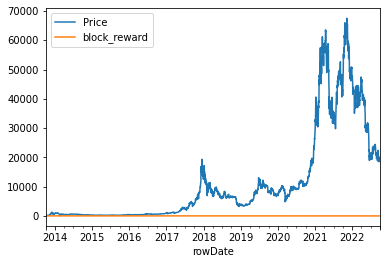

In [61]:
# Plot the multivariate time series
bitcoin_prices_block.plot();

The block reward is flat since the scale of the price is so much higher

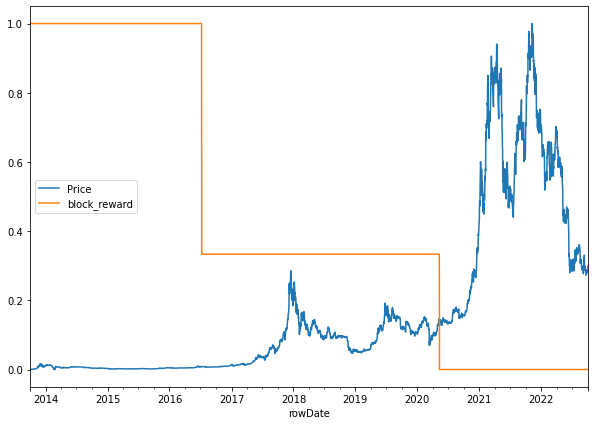

In [62]:
# Scale and plot
from sklearn.preprocessing import minmax_scale

scaled_price_block_df = pd.DataFrame(
    minmax_scale(bitcoin_prices_block[['Price', 'block_reward']]),
    columns=bitcoin_prices_block.columns,
    index=bitcoin_prices_block.index
).plot(figsize=(10, 7));

It seems as if the price of bitcoin goes up as the block reward goes down

### Make a windowed dataset with Pandas

Previously, some custom made functions were used to window the univariate time series.

However, now since the data is multivariate, they won't work

In [63]:
HORIZON = 1
WINDOW_SIZE = 7

In [64]:
# Create a copy of block engineered data
bitcoin_prices_windowed = bitcoin_prices_block.copy()
bitcoin_prices_windowed.head()

,Price,block_reward
rowDate,,
2013-10-01,140.300003,25
2013-10-02,123.000000,25
2013-10-03,130.990005,25
2013-10-04,136.820007,25
2013-10-05,136.699997,25


In [65]:
for i in range(WINDOW_SIZE):
    bitcoin_prices_windowed[f'Price+{i+1}'] = bitcoin_prices_windowed['Price'].shift(periods=i+1)

bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,,
2013-10-01,140.300003,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,123.000000,25,140.300003,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,130.990005,25,123.000000,140.300003,NaN,NaN,NaN,NaN,NaN
2013-10-04,136.820007,25,130.990005,123.000000,140.300003,NaN,NaN,NaN,NaN
2013-10-05,136.699997,25,136.820007,130.990005,123.000000,140.300003,NaN,NaN,NaN
2013-10-06,137.800003,25,136.699997,136.820007,130.990005,123.000000,140.300003,NaN,NaN
2013-10-07,135.800003,25,137.800003,136.699997,136.820007,130.990005,123.000000,140.300003,NaN
2013-10-08,136.490005,25,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000,140.300003
2013-10-09,139.500000,25,136.490005,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000


Window for a week (7) to predict a horizon of 1 (multivariate time series)

```
WINDOW_SIZE & block_reward -> HORIZON
```

```
[0, 1, 2, 3, 4, 5, 6, block_reward] -> [7]
[1, 2, 3, 4, 5, 6, 7, block_reward] -> [8]
[2, 3, 4, 5, 6, 7, 8, block_reward] -> [9]
```

In [67]:
# Create X (windows) and y (horizon)
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32)
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [68]:
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,
2013-10-08,25.0,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000,140.300003
2013-10-09,25.0,136.490005,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000
2013-10-10,25.0,139.500000,136.490005,135.800003,137.800003,136.699997,136.820007,130.990005
2013-10-11,25.0,140.410004,139.500000,136.490005,135.800003,137.800003,136.699997,136.820007
2013-10-12,25.0,140.100006,140.410004,139.500000,136.490005,135.800003,137.800003,136.699997


In [70]:
y.head()

rowDate
2013-10-08    136.490005
2013-10-09    139.500000
2013-10-10    140.410004
2013-10-11    140.100006
2013-10-12    142.889999
Name: Price, dtype: float32

In [71]:
# Create train & test sets

In [72]:
split_size = int(len(X) * .8)

X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2627, 2627, 657, 657)

In [131]:
X_test

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,
2020-12-17,6.25,21352.162109,19434.855469,19273.837891,19176.787109,18808.919922,18023.613281,18247.216797
2020-12-18,6.25,22825.375000,21352.162109,19434.855469,19273.837891,19176.787109,18808.919922,18023.613281
2020-12-19,6.25,23127.923828,22825.375000,21352.162109,19434.855469,19273.837891,19176.787109,18808.919922
2020-12-20,6.25,23843.955078,23127.923828,22825.375000,21352.162109,19434.855469,19273.837891,19176.787109
2020-12-21,6.25,23474.878906,23843.955078,23127.923828,22825.375000,21352.162109,19434.855469,19273.837891
...,...,...,...,...,...,...,...,...
2022-09-30,6.25,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828,18925.199219,19293.533203
2022-10-01,6.25,19423.003906,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828,18925.199219
2022-10-02,6.25,19311.898438,19423.003906,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828


### Model 06 - Dense (Window = 7, horizon = 1)

Use past 7 days data to predict a day in the future

In [73]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(HORIZON)
], name='model_6_dense_multivariate')

model_6.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam(),
)

model_6.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[
        create_model_checkpoint(model_name=model_6.name)
    ]
)

Epoch 1/100
21/21 [==============================] - 3s 154ms/step - loss: 750.4602 - val_loss: 2911.0071
Epoch 2/100
21/21 [==============================] - 1s 52ms/step - loss: 236.6664 - val_loss: 1755.4604
Epoch 3/100
21/21 [==============================] - 1s 58ms/step - loss: 175.9193 - val_loss: 1557.7689
Epoch 4/100
21/21 [==============================] - 1s 61ms/step - loss: 156.7720 - val_loss: 1401.8204
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 150.7600 - val_loss: 1433.0182
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 151.5735 - val_loss: 1525.9606
Epoch 7/100
21/21 [==============================] - 1s 59ms/step - loss: 148.3987 - val_loss: 1381.1853
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 146.8737 - val_loss: 1552.7332
Epoch 9/100
21/21 [==============================] - 1s 57ms/step - loss: 143.1185 - val_loss: 1279.7208
Epoch 10/100
21/21 [==============================] - 0s 

21/21 [==============================] - 2s 75ms/step - loss: 127.6243 - val_loss: 1152.0980
Epoch 60/100
21/21 [==============================] - 0s 4ms/step - loss: 128.7718 - val_loss: 1231.8571
Epoch 61/100
21/21 [==============================] - 1s 58ms/step - loss: 122.9120 - val_loss: 1152.0105
Epoch 62/100
21/21 [==============================] - 0s 3ms/step - loss: 122.5905 - val_loss: 1175.3726
Epoch 63/100
21/21 [==============================] - 1s 67ms/step - loss: 123.2210 - val_loss: 1150.0132
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 124.9301 - val_loss: 1255.0222
Epoch 65/100
21/21 [==============================] - 0s 4ms/step - loss: 137.0371 - val_loss: 1363.8359
Epoch 66/100
21/21 [==============================] - 0s 4ms/step - loss: 137.4013 - val_loss: 1153.5800
Epoch 67/100
21/21 [==============================] - 1s 65ms/step - loss: 128.1972 - val_loss: 1149.8773
Epoch 68/100
21/21 [==============================] - 0s 3ms/ste

In [74]:
model_6.evaluate(X_test, y_test)

21/21 [==============================] - 0s 1ms/step - loss: 1412.8076


1412.8076171875

In [75]:
model_6 = tf.keras.models.load_model('model_checkpoints/model_6_dense_multivariate')
model_6.evaluate(X_test, y_test)

21/21 [==============================] - 0s 1ms/step - loss: 1146.9922


1146.9921875

In [76]:
model_6_preds = model_6.predict(X_test)
model_6_preds[:10]

21/21 [==============================] - 0s 997us/step


array([[21221.877],
       [22744.033],
       [23131.777],
       [23824.037],
       [23672.318],
       [22788.355],
       [23659.19 ],
       [23304.541],
       [23637.072],
       [24607.076]], dtype=float32)

In [77]:
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]

21/21 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([21221.877, 22744.033, 23131.777, 23824.037, 23672.318, 22788.355,
       23659.19 , 23304.541, 23637.072, 24607.076], dtype=float32)>

In [78]:
model_6_results = evaluate_preds(
    y_test,
    model_6_preds
)

model_6_results

{'mae': 1146.9922,
 'mse': 2604766.5,
 'rmse': 1613.929,
 'mape': '2.876232862472534%',
 'mase': 1.0036911}

In [79]:
naive_forecast_results

{'mae': 1144.453519780585,
 'mse': 2611117.2588876244,
 'rmse': 1615.8951880885172,
 'mape': '2.8748727508170346%',
 'mase': 1.0010289163281425}

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-improving-a-model-from-model-perspective.png' />

Is there a better way to create this model?

As in, should the `block_reward` feature be bundled in with the Bitcoin historical price feature?

Perhaps a multi-input model (e.g. one model input for Bitcoin price history and one model input for block_reward) works better?

### Model 07 - N-Beats SOTA for univariate time series

The N-BEATS algorithm achieved state-of-the-art performance in the M4 competition, therefore, this architecture might just beat the Naive forecast?

N-BEATS paper: https://arxiv.org/abs/1905.10437 that proposes the below architecture
<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png' />
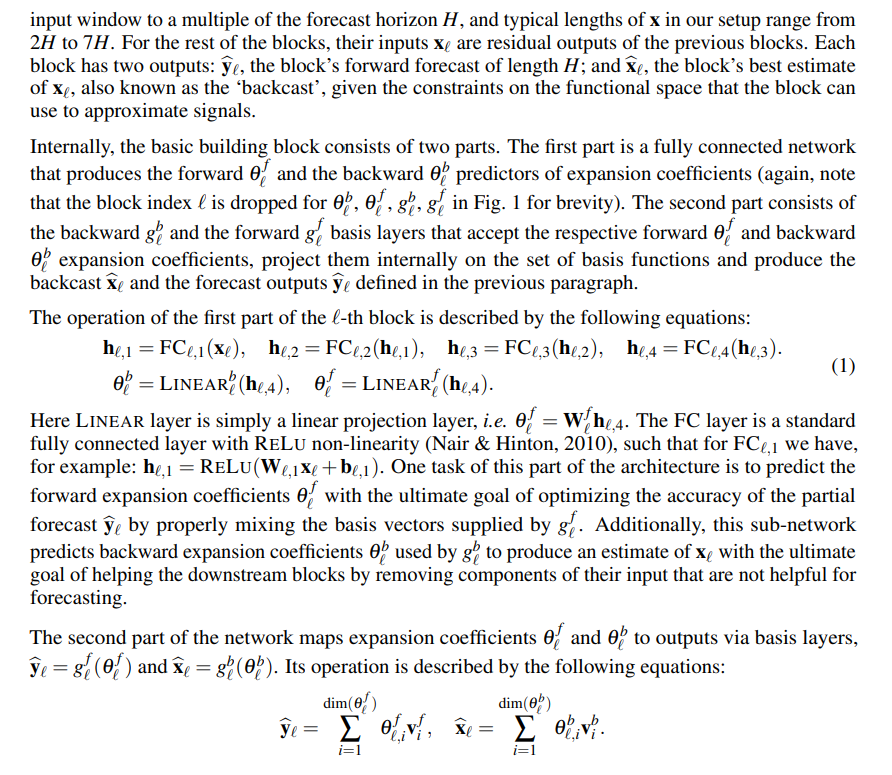

TensorFlow does not have the N-BEATS algorithm API

A custom one can be built by subclassing the Layer class https://keras.io/guides/making_new_layers_and_models_via_subclassing/

In [64]:
# Create N-BEATS block layer
class NBeatsBlock(tf.keras.layers.Layer):
    # Initialize block
    def __init__(
        self,
        input_size: int,
        theta_size: int,
        horizon: int,
        n_neurons: int,
        n_layers: int,
        
        # takes care of all of the arguments for the parent class
        **kwargs
    ):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.theta_size = theta_size
        self.horizon = horizon
        
        # No. of units in hidden layer, No. of layers in stack
        self.n_neurons = n_neurons
        self.n_layers = n_layers
        
        # block contains stack of 4 FC layers with ReLU
        self.hidden = [tf.keras.layers.Dense(n_neurons, activation='relu') for _ in range(n_layers)]
        
        # output of a block is a linear theta layer
        self.theta_layer = tf.keras.layers.Dense(theta_size, activation='linear', name='theta')

    # runs when layer is called
    def call(self, inputs):
        x = inputs
        # pass through each hidden layer
        for layer in self.hidden:
            x = layer(x)
            
        theta = self.theta_layer(x)
        
        # output backcast and forecast from theta
        backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
        return backcast, forecast

Setting up the NBeatsBlock custom layer the following can be identified:

* The class inherits from `tf.keras.layers.Layer` (this gives it all of the methods assosciated with `tf.keras.layers.Layer`)

* The constructor takes all of the layers hyperparameters as well as the `**kwargs` argument
  * The `**kwargs` argument takes care of all of the hyperparameters which aren't mentioned in the constructor such as, input_shape, trainable and name

* In the constructor, the block architecture layers are created:
  * The hidden layers are created as a stack of `n_nuerons` hidden units fully connected layers with ReLU activation
  * The theta layer uses `theta_size` hidden units as well as linear activation

* The `call()` method is what is run when the layer is called:
  * It first passes the inputs (the historical Bitcoin data) through each of the hidden layers (a stack of fully connected layers with ReLU activation)
  * After the inputs have been through each of the fully connected layers, they get passed through the theta layer where the backcast (backwards predictions, shape: `input_size`) and forecast (forward predictions, shape: `horizon`) are returned
  
<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-basic-block-replication-with-tensorflow-layer-subclassing.png' />

In [74]:
tf.random.set_seed(42)

# setup dummy nbeats block
dummy_nbeats_block_layer = NBeatsBlock(
    input_size=WINDOW_SIZE,
    
    # theta Handles backcast and forecast
    theta_size=WINDOW_SIZE + HORIZON,
    horizon=HORIZON,
    n_neurons=128,
    n_layers=4
)

In [75]:
# create dummy inputs - dense layer input dims must be 2
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]])>

In [76]:
# test out nbeats block
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
backcast, forecast

(<tf.Tensor: shape=(1, 7), dtype=float32, numpy=
 array([[-0.50112426, -0.2659802 ,  0.14371218, -0.24863659, -0.41518795,
         -0.32914308,  0.56662744]], dtype=float32)>,
 <tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.6038071]], dtype=float32)>)

#### Create performant datasets

Since this is a larger model architecture, to ensure the training runs as fast as possible, the datasets can be setup using the `tf.data` API.

In [77]:
HORIZON = 1
WINDOW_SIZE = 7

In [78]:
bitcoin_prices.head()

,Price
rowDate,
2013-10-01,140.300003
2013-10-02,123.000000
2013-10-03,130.990005
2013-10-04,136.820007
2013-10-05,136.699997


In [79]:
# Add windowed columns
bitcoin_prices_nbeats = bitcoin_prices.copy()
for i in range(WINDOW_SIZE):
    bitcoin_prices_nbeats[f'Price+{i+1}'] = bitcoin_prices_nbeats['Price'].shift(periods=i+1)
    
bitcoin_prices_nbeats.head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,
2013-10-01,140.300003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,123.000000,140.300003,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,130.990005,123.000000,140.300003,NaN,NaN,NaN,NaN,NaN
2013-10-04,136.820007,130.990005,123.000000,140.300003,NaN,NaN,NaN,NaN
2013-10-05,136.699997,136.820007,130.990005,123.000000,140.300003,NaN,NaN,NaN


In [80]:
X = bitcoin_prices_nbeats.dropna().drop('Price', axis=1)
y = bitcoin_prices_nbeats.dropna()['Price']

In [81]:
split_size = int(len(X) * .8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2627, 7), (657, 7), (2627,), (657,))

Convert the above data into TensorFlow `tf.data.Dataset`'s to ensure they run as fast as possible whilst training.

This can be done by:
* Turning the arrays in tensor Datasets using `tf.data.Dataset.from_tensor_slices()`
  * **Note**: `from_tensor_slices()` works best when thr data fits in memory, for extremely large datasets, look into using the `TFRecord` format

* Combine the labels and features tensors into a Dataset using `tf.data.Dataset.zip()`

* Batch and prefetch the Datasets using `batch()` and `prefetch()`
  * Batching and prefetching ensures the loading time from CPU (preparing data) to GPU (computing on data) is as small as possible
  
<img src='https://media.cheggcdn.com/prep/999/9996379a-dd5f-4cf0-9af2-e458a0467a9f/screen-shot-2022-03-12-at-10-44-09-am.png' />

In [82]:
# create tensorflow Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# Combine features and labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# batch and prefetch for optimal performance
BATCH_SIZE = 1024 # from Appendix D.1 of the paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

The input shape of `(None, 7)` shows that the value None is a placeholder for the batch size until added by the model and 7 is the window size

#### Setup N-BEATS hyperparameters

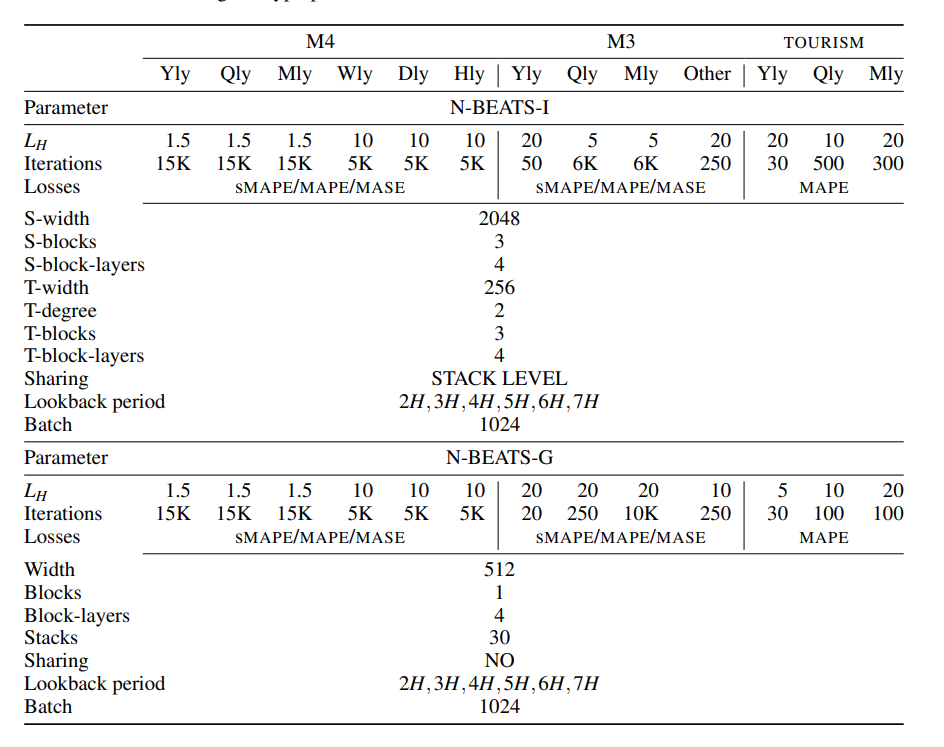

The model built is following the N-BEATS general and has daily data

In [84]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D.1

# No. of iterations
N_EPOCHS = 5000

# Width -> No. of units; depth -> No. of layers
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

# the above figure uses an ensemble model each at their own horizons
# ftm, for this model its only 1 step
INPUT_SIZE = WINDOW_SIZE * HORIZON # 'Lookback' in Table 18

# backcast and forecast
THETA_SIZE = INPUT_SIZE + HORIZON

#### Getting ready for residual connections

Before the N-BEATS model can be created, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS **double residual stacking** (section 3.2 of the N-BEATS paper) possible:
* `tf.keras.layers.subtract(inputs)` - subtracts list of input tensors from each other
* `tf.keras.layers.add(inputs)` - adds list of input tensors to each other
Let's try them out.

The N-BEATS uses this stacking to help train its deeper architecture

A residual connection (skip connection) involves a deeper neural netwrok layer receiving the outputs as well as the inputs of a shallower neural network layer.

In the case of N-BEATS, the architecture uses residual connections which:
* Subtract the backcast outputs from a previous block from the backcast inputs to the current block
* Add the forecast outputs from all blocks together in a stack

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-architecture-double-residual-stacking.png' />

*Backcast residuals of each block are subtracted from each other and used as the input to the next block where as the forecasts of each block are added together to become the stack forecast*

Residual connections help in training deeper models as it solves the issues of vanishing gradients (patterns learned by a neural network not being passed through to deeper layers).

In [90]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])

# Add
added = tf.keras.layers.add([tensor_1, tensor_2])

print(f'Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}')
print(f'Subtracted: {subtracted.numpy()}')
print(f'Added: {added.numpy()}')

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


### Model 09: Train a model on the full data to predict the future

To make predictions into the future, the model will be trained on the full dataset, and then predict to a specific horizon

The full dataset is used since there is no test set (Previously, the data was split into train and test to evaluate how the model performs)

> **Side-note**: Forecasting models need to be retrained every time a forecast is made. Why? Because if Bitcoin prices are updated daily and you predict the price for tomorrow. Your model is only really valid for one day. When a new price comes out (e.g. the next day), you'll have to retrain your model to incorporate that new price to predict the next forecast

In [80]:
bitcoin_prices_windowed.head()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,,
2013-10-01,140.300003,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,123.000000,25,140.300003,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,130.990005,25,123.000000,140.300003,NaN,NaN,NaN,NaN,NaN
2013-10-04,136.820007,25,130.990005,123.000000,140.300003,NaN,NaN,NaN,NaN
2013-10-05,136.699997,25,136.820007,130.990005,123.000000,140.300003,NaN,NaN,NaN


In [81]:
bitcoin_prices_windowed.tail()

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,,,
2022-09-30,19423.003906,6.25,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828,18925.199219,19293.533203
2022-10-01,19311.898438,6.25,19423.003906,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828,18925.199219
2022-10-02,19052.183594,6.25,19311.898438,19423.003906,19592.951172,19410.955078,19080.996094,19225.679688,18803.173828
2022-10-03,19628.281250,6.25,19052.183594,19311.898438,19423.003906,19592.951172,19410.955078,19080.996094,19225.679688
2022-10-04,20340.177734,6.25,19628.281250,19052.183594,19311.898438,19423.003906,19592.951172,19410.955078,19080.996094


In [151]:
# Train model on entire data
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'block_reward'], axis=1).astype(np.float32)
y_all = bitcoin_prices_windowed['Price'].astype(np.float32)

In [152]:
X_all.head()

,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
rowDate,,,,,,,
2013-10-08,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000,140.300003
2013-10-09,136.490005,135.800003,137.800003,136.699997,136.820007,130.990005,123.000000
2013-10-10,139.500000,136.490005,135.800003,137.800003,136.699997,136.820007,130.990005
2013-10-11,140.410004,139.500000,136.490005,135.800003,137.800003,136.699997,136.820007
2013-10-12,140.100006,140.410004,139.500000,136.490005,135.800003,137.800003,136.699997


In [153]:
y_all.head()

rowDate
2013-10-01    140.300003
2013-10-02    123.000000
2013-10-03    130.990005
2013-10-04    136.820007
2013-10-05    136.699997
Name: Price, dtype: float32

Convert data into optimized TensorFlow Datasets:
* Turning all `X_all` and `y_all` into tensor Datasets  using `tf.data.Dataset.from_tensor_slices()`
* Combining features and labels into a Dataset tuple using `tf.data.Dataset.zip()`
* batch and prefetch data using `tf.data.Dataset.batch()` and `tf.data.Dataset.prefetch()`

In [154]:
# Convert X,y to tensor datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# Combine features and labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# Batch and prefetch for optimal performance
BATCH_SIZE = 1024
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float32, name=None))>

In [155]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(HORIZON)
], name='model_9_dense_future')

model_9.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam()
)

model_9.fit(
    dataset_all,
    epochs=100,
    callbacks=[
        create_model_checkpoint(model_name=model_9.name)
    ]
)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 7418.5967
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 3172.8647
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 1300.2880
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 1450.8806
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 564.2144
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 621.0137
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 695.0601
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 447.8526
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 511.7242
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 537.3207
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 398.2985
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 400.0682
Epoch 13/100
4/4 [===============

Epoch 38/100
4/4 [==============================] - 0s 3ms/step - loss: 462.4878
Epoch 39/100
4/4 [==============================] - 0s 3ms/step - loss: 300.5036
Epoch 40/100
4/4 [==============================] - 0s 3ms/step - loss: 334.5567
Epoch 41/100
4/4 [==============================] - 0s 3ms/step - loss: 412.9033
Epoch 42/100
4/4 [==============================] - 0s 3ms/step - loss: 483.9174
Epoch 43/100
4/4 [==============================] - 0s 3ms/step - loss: 267.4523
Epoch 44/100
4/4 [==============================] - 0s 2ms/step - loss: 290.2752
Epoch 45/100
4/4 [==============================] - 0s 3ms/step - loss: 514.6270
Epoch 46/100
4/4 [==============================] - 0s 3ms/step - loss: 577.8846
Epoch 47/100
4/4 [==============================] - 0s 3ms/step - loss: 235.9006
Epoch 48/100
4/4 [==============================] - 0s 3ms/step - loss: 308.6326
Epoch 49/100
4/4 [==============================] - 0s 3ms/step - loss: 473.0770
Epoch 50/100
4/4 [==========

4/4 [==============================] - 0s 3ms/step - loss: 307.1954
Epoch 76/100
4/4 [==============================] - 0s 3ms/step - loss: 370.8655
Epoch 77/100
4/4 [==============================] - 0s 3ms/step - loss: 281.0909
Epoch 78/100
4/4 [==============================] - 0s 3ms/step - loss: 349.8029
Epoch 79/100
4/4 [==============================] - 0s 3ms/step - loss: 308.1944
Epoch 80/100
4/4 [==============================] - 0s 3ms/step - loss: 357.7635
Epoch 81/100
4/4 [==============================] - 0s 3ms/step - loss: 283.7047
Epoch 82/100
4/4 [==============================] - 0s 3ms/step - loss: 347.0901
Epoch 83/100
4/4 [==============================] - 0s 3ms/step - loss: 296.1254
Epoch 84/100
4/4 [==============================] - 0s 3ms/step - loss: 350.3222
Epoch 85/100
4/4 [==============================] - 0s 3ms/step - loss: 290.0505
Epoch 86/100
4/4 [==============================] - 0s 3ms/step - loss: 340.4742
Epoch 87/100
4/4 [=======================

In [156]:
import os

# Create a function to implement a model checkpoint with a specific filename
def create_model_checkpoint(model_name, save_path='model_checkpoints', monitor_dataset_loss=False):         
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name),
        verbose=0,
        save_best_only=True,
        monitor='loss' if monitor_dataset_loss else 'val_loss',
    )

In [157]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(HORIZON)
], name='model_9_dense_future')

model_9.compile(
    loss='mae',
    optimizer=tf.keras.optimizers.Adam()
)

model_9.fit(
    dataset_all,
    epochs=100,
    callbacks=[
        create_model_checkpoint(model_name=model_9.name, monitor_dataset_loss=True)
    ]
)

Epoch 1/100
4/4 [==============================] - 1s 340ms/step - loss: 9804.8975
Epoch 2/100
4/4 [==============================] - 1s 321ms/step - loss: 6014.7173
Epoch 3/100
4/4 [==============================] - 1s 323ms/step - loss: 1901.4248
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 2330.2493
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 2801.8977
Epoch 6/100
4/4 [==============================] - 1s 399ms/step - loss: 1173.9282
Epoch 7/100
4/4 [==============================] - 1s 319ms/step - loss: 1086.7059
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 1364.6587
Epoch 9/100
4/4 [==============================] - 1s 341ms/step - loss: 511.6628
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 958.2790
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 702.5437
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 617.1836
Epoch 13/100
4/4 

In [158]:
model_9 = tf.keras.models.load_model('model_checkpoints/model_9_dense_future')

### Make predictions on the future

**Side-Note**: Model must be retrained whenever its predicted - or more rather retrain each day, as the data is updated only each day

Once again, the machine learning models have performed quite poorly at predicting the price of Bitcoin (time series forecasting in open systems is typically a game of luck), often worse than the naive forecast.

In [178]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # Predict 14 days in future

<img src='https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png' />

Create a function that:
* Creates an empty list of future forecasts and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data - `original_input` will be the last window of the historical data)
* Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first value and append the latest prediction - `updated_input_1` must be `prediction_1`, not `original_input`, and so on

The future predictions will be made using the model's own previous predictions

In [179]:
# Create function to make predictions into the future
def make_future_forecasts(values, model, into_future, window_size=WINDOW_SIZE):
    future_forecast = []

    # Last {WINDOW_SIZE} values
    last_window = values[-window_size:]
    
    # Predict {into_future} times
    for _ in range(into_future):
        future_pred = tf.squeeze(
            model.predict(tf.expand_dims(last_window, axis=0))
        ).numpy()
        print(f'Predicting on:\n{last_window} -> Prediction: {future_pred}')
        
        # Update future forecast list
        future_forecast.append(future_pred)
        print(f'Future forecast:\n{future_forecast}')
        
        # Update last window: append latest and take last {WINDOW_SIZE} values
        last_window = np.append(last_window, future_pred)[-window_size:]
        
    return future_forecast

In [202]:
future_forecast = make_future_forecasts(
    values=y_all,
    model=model_9,
    into_future=INTO_FUTURE,
    window_size=WINDOW_SIZE
)

1/1 [==============================] - 0s 19ms/step
Predicting on:
rowDate
2022-09-28    19410.955078
2022-09-29    19592.951172
2022-09-30    19423.003906
2022-10-01    19311.898438
2022-10-02    19052.183594
2022-10-03    19628.281250
2022-10-04    20340.177734
Name: Price, dtype: float32 -> Prediction: 19821.271484375
Future forecast:
[19821.271]
1/1 [==============================] - 0s 21ms/step
Predicting on:
[19592.951 19423.004 19311.898 19052.184 19628.281 20340.178 19821.271] -> Prediction: 19906.3359375
Future forecast:
[19821.271, 19906.336]
1/1 [==============================] - 0s 18ms/step
Predicting on:
[19423.004 19311.898 19052.184 19628.281 20340.178 19821.271 19906.336] -> Prediction: 19880.8828125
Future forecast:
[19821.271, 19906.336, 19880.883]
1/1 [==============================] - 0s 19ms/step
Predicting on:
[19311.898 19052.184 19628.281 20340.178 19821.271 19906.336 19880.883] -> Prediction: 19874.453125
Future forecast:
[19821.271, 19906.336, 19880.883, 198

In [196]:
future_forecast

[19821.271,
 19906.336,
 19880.883,
 19874.453,
 19881.729,
 19916.97,
 19808.908,
 19849.482,
 19814.35,
 19809.812,
 19789.578,
 19778.44,
 19750.695,
 19747.49]

### Plot future forecasts

In [197]:
# Create a function to return dates from start_date to start_date+into_future
def get_future_dates(start_date, into_future, offset=1):
    start_date = start_date + np.timedelta64(offset, 'D')
    end_date = start_date + np.timedelta64(into_future, 'D')
    return np.arange(start_date, end_date, dtype='datetime64[D]')

In [198]:
# Current available last timestep & price
last_timestep, last_price = bitcoin_prices.index[-1], prices[-1]
last_timestep, last_price

(Timestamp('2022-10-04 00:00:00'), 20340.177734375)

In [203]:
# Get INTO_FUTURE timestamps
next_time_steps = get_future_dates(
    start_date=last_timestep, 
    into_future=INTO_FUTURE
)

next_time_steps

array(['2022-10-05', '2022-10-06', '2022-10-07', '2022-10-08',
       '2022-10-09', '2022-10-10', '2022-10-11', '2022-10-12',
       '2022-10-13', '2022-10-14', '2022-10-15', '2022-10-16',
       '2022-10-17', '2022-10-18'], dtype='datetime64[D]')

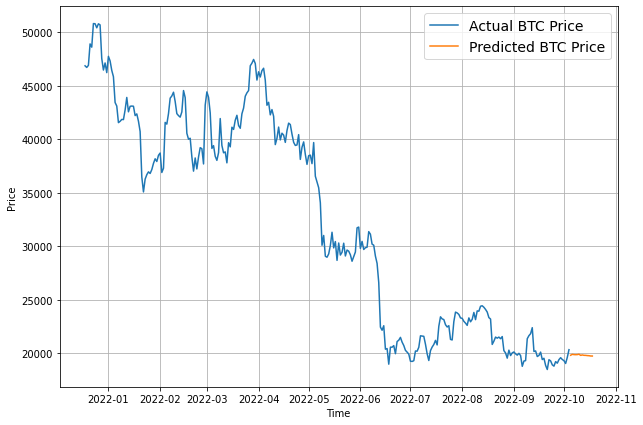

In [204]:
plt.figure(figsize=(10, 7))
plot_time_series(
    bitcoin_prices.index,
    prices,
    start=3000,
    format='-',
    label='Actual BTC Price'
)

plot_time_series(
    next_time_steps,
    future_forecast,
    format='-',
    label='Predicted BTC Price'
)

Lines are not connected

In [205]:
# Insert latest data to join lines together
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, last_price)

next_time_steps, future_forecast

(array(['2022-10-04', '2022-10-05', '2022-10-06', '2022-10-07',
        '2022-10-08', '2022-10-09', '2022-10-10', '2022-10-11',
        '2022-10-12', '2022-10-13', '2022-10-14', '2022-10-15',
        '2022-10-16', '2022-10-17', '2022-10-18'], dtype='datetime64[D]'),
 array([20340.178, 19821.271, 19906.336, 19880.883, 19874.453, 19881.729,
        19916.97 , 19808.908, 19849.482, 19814.35 , 19809.812, 19789.578,
        19778.44 , 19750.695, 19747.49 ], dtype=float32))

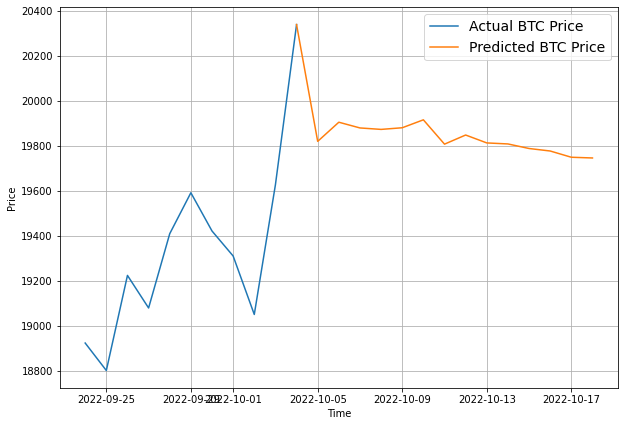

In [213]:
plt.figure(figsize=(10, 7))
plot_time_series(
    bitcoin_prices.index,
    prices,
    start=3280,
    format='-',
    label='Actual BTC Price'
)

plot_time_series(
    next_time_steps,
    future_forecast,
    format='-',
    label='Predicted BTC Price'
)

**Note**

univariate forecasting can be done for multiple days in future, however multivariate cannot.

Multivariate can only forecast one day in future: the exogenous features are present only the day before - to perform multivariate forecasting for multiple days in future the exogenous values of those days must also be known.

This is alright in the case of the block reward size since it changes only once every 4 years, therefore this can be engineered in. However, if twitter volume, sentiment is to be included this will not be possible, since the following day's data is unknown.

A far-fetched idea could be to further predict those exogenous features as well upon the first forecast and use them for more days in future.